<a href="https://colab.research.google.com/github/Yihoon-J/Reproduce_pyecharts_doc/blob/main/Pyecharts_%EA%B5%90%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyecharts 기초
2022.11.07

Pyecharts는 중국 포털사이트 Baidu에서 개발한 데이터 시각화(数据可视化: 수거가견화) 툴입니다.

기존의 시각화 패키지와는 달리 시각화 결과물의 상호작용이 가능하고 심미성도 뛰어나 주목받고 있습니다.

그래프의 출력 결과가 html문서로 제공되는 것이 다른 시각화 패키지와의 차이점입니다.

또한 기존의 시각화 패키지에서는 한글을 사용하려면 별도의 패키지를 사용해야 했던 것과 달리, `pyecharts`는 한글을 기본으로 지원합니다.

* [공식 패키지 문서](https://pyecharts.org/#/en-us/)
* [공식 깃허브 문서 (중국어)](https://github.com/pyecharts/pyecharts)

## 패키지 설치 및 호출 ★
pyecharts 아래 두 가지 중 선호하는 방법을 사용하시면 됩니다.

단, 두 방법은 모두 최신 버전을 설치할 때를 기준으로 합니다.

공식 문서는 구 버전을 기준으로 만들어져 있기 때문에, 다양한 시각화를 위해서는 구 버전 설치를 권장합니다.

구버전 설치 코드는 아래 '고급 시각화' 섹션에서 다시 다루겠습니다.

In [ ]:
# 설치 방법 1. pip를 활용한 설치
!pip install -U pyecharts

# 설치 방법 2. 깃허브에 업로드된 source code를 수동으로 설치
'''
!git clone https://github.com/pyecharts/pyecharts.git
!cd pyecharts #설치 경로 설정
!pip install -r "/content/pyecharts/requirements.txt" #설치 경로에 맞게 수정해주세요.
!python "/content/pyecharts/setup.py" install #설치 경로에 맞게 수정해주세요.
'''

# 설치 후 런타임을 재시작해 주시기 바랍니다. 재시작 후에는 바로 다음 셀을 실행하시면 됩니다.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'\n!git clone https://github.com/pyecharts/pyecharts.git\n!cd pyecharts #설치 경로 설정\n!pip install -r "/content/pyecharts/requirements.txt" #설치 경로에 맞게 수정해주세요.\n!python "/content/pyecharts/setup.py" install #설치 경로에 맞게 수정해주세요.\n'

## 기본 시각화 실습 



먼저 간단한 **막대그래프(Bar chart)**를 그려 봅시다.

In [ ]:
#필요한 패키지를 호출
from pyecharts.charts import Bar
from pyecharts import options as opts

### 데이터 1개짜리 막대그래프 그리기 ★
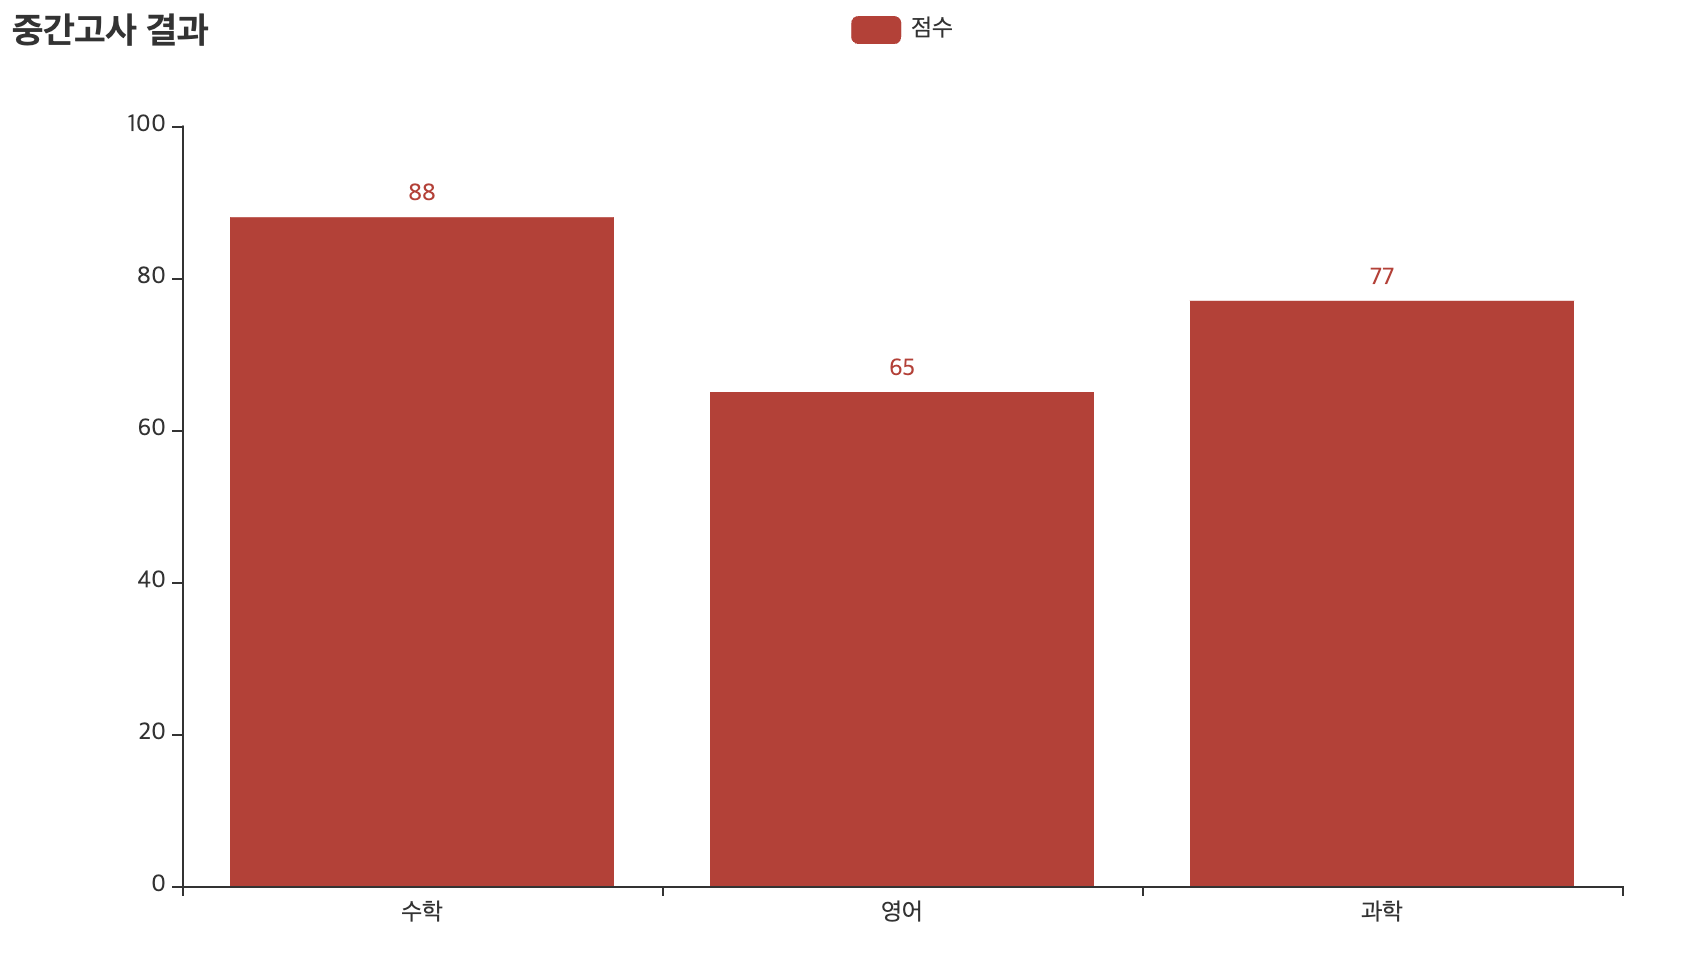


In [ ]:
bar = (
    Bar() #원하는 그래프 형태를 먼저 선언
    .add_xaxis(["수학", "영어", "과학"]) #x값 추가
    .add_yaxis("점수", [88, 65, 77]) #y값 라벨 및 값 추가
    .set_global_opts(title_opts=opts.TitleOpts(title="중간고사 결과")) #그래프 제목 추가
)
bar.render('single bar chart.html') #완성된 객체를 랜더링

'/content/single bar chart.html'

### 데이터 2개짜리 막대그래프 그리기 ★
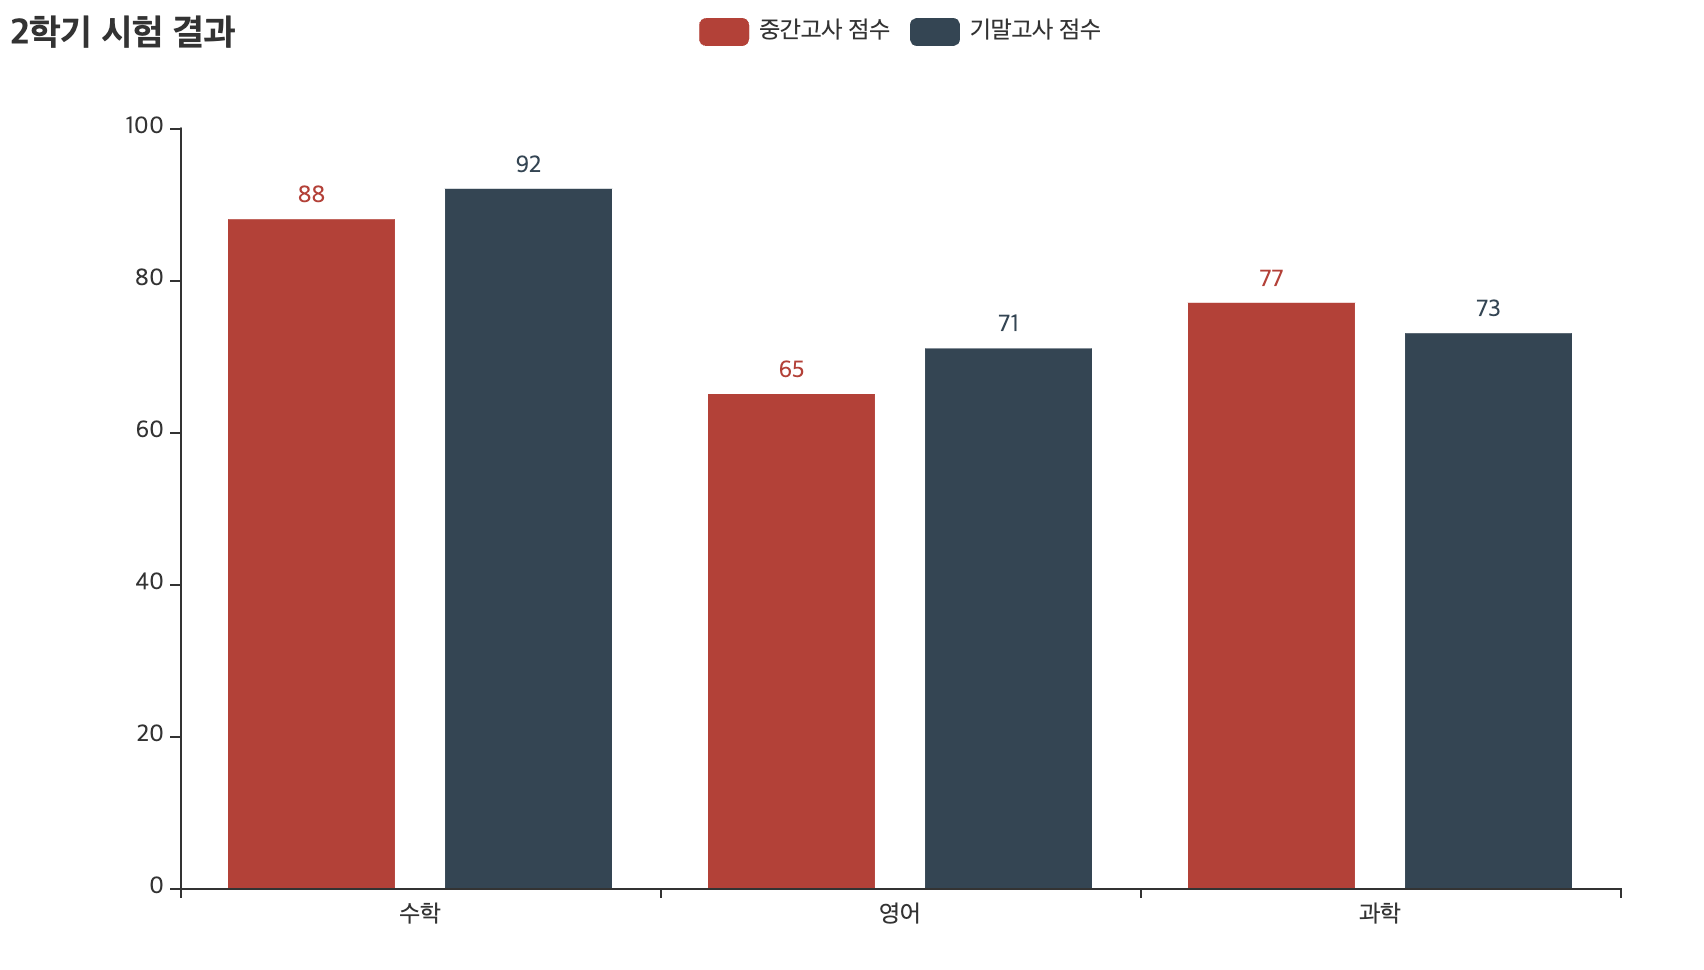

In [ ]:
bar = (
    Bar()
    .add_xaxis(["수학", "영어", "과학"])
    .add_yaxis("중간고사 점수", [88, 65, 77])
    .add_yaxis("기말고사 점수", [92,71,73])
    .set_global_opts(title_opts=opts.TitleOpts(title="2학기 시험 결과"))
)
bar.render('dual bar chart.html')

'/content/dual bar chart.html'

### 테마 변경하기
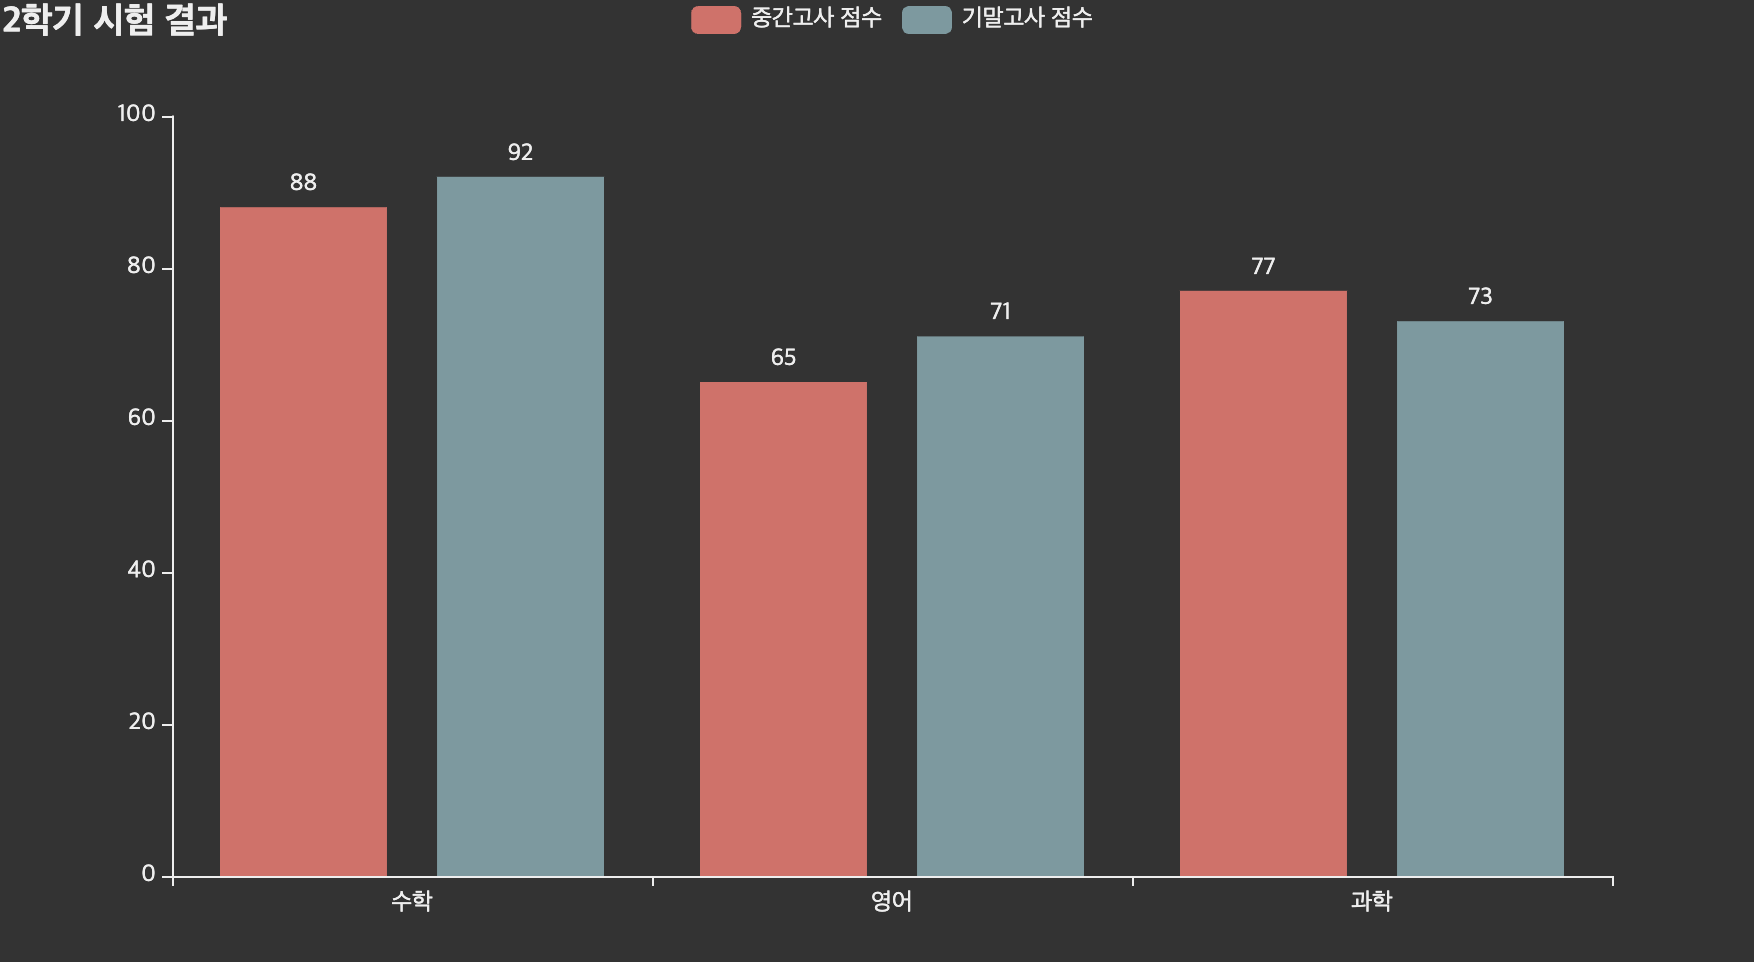

In [ ]:
from pyecharts.globals import ThemeType #테마 설정 패키지
bar=(
  Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK)) #테마 설정
  .add_xaxis(["수학", "영어", "과학"])
  .add_yaxis("중간고사 점수", [88, 65, 77])
  .add_yaxis("기말고사 점수", [92,71,73])
  .set_global_opts(title_opts=opts.TitleOpts(title="2학기 시험 결과"))
)
bar.render('dark mode bar chart.html')

'/content/dark mode bar chart.html'

### 이미지로 저장하기

이미지로 저장하기 위해서는 다음 과정이 필요합니다.
1. snpashot-selenium 설치
```
!pip install snapshot-selenium
```
2. 자신의 웹브라우저에 맞는 웹드라이버를 현재 작업 공간에 저장해 주세요.

  Chrome: [크롬 드라이버](https://chromedriver.chromium.org/downloads)

  Edge: [엣지 드라이버](https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/)
  
  Safari: [개발자 모드 활성화](https://blog.naver.com/yy-00/222349987194) 후 `개발자용` - `원격 자동화 허용` 옵션을 활성화

In [ ]:
#Chrome, Edge용 코드
bar = (
    Bar()
    .add_xaxis(["수학", "영어", "과학"])
    .add_yaxis("중간고사 점수", [88, 65, 77])
    .add_yaxis("기말고사 점수", [92,71,73])
    .set_global_opts(title_opts=opts.TitleOpts(title="2학기 시험 결과"))
)
make_snapshot(driver, bar.render(), 'bar.png')

#Safari용 코드
'''
from pyecharts.render import make_snapshot
import snapshot_selenium.snapshot as driver
bar = (
    Bar()
    .add_xaxis(["수학", "영어", "과학"])
    .add_yaxis("중간고사 점수", [88, 65, 77])
    .add_yaxis("기말고사 점수", [92,71,73])
    .set_global_opts(title_opts=opts.TitleOpts(title="2학기 시험 결과"))
)
make_snapshot(driver, bar.render(), 'bar.png', browser='Safari')
'''

### 다른 시각화 패키지와 비교

우리가 사용해본 적 있는 `matplotlib`, `seaborn`과 비교해 볼까요?


먼저 `matplotlib`부터 살펴 봅시다.

* `bar_label` 에러가 발생할 경우 아래 코드를 복사하여 실행한 후 런타임을 재시작하시기 바랍니다.

```
!pip install -U matplotlib #최신 버전의 matplotlib 설치
```

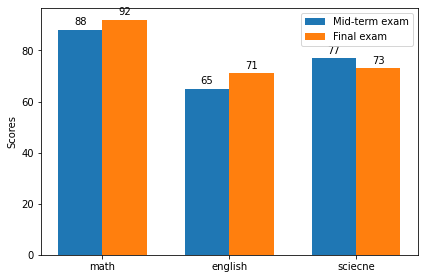

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#데이터 지정
labels = ['math','english','sciecne']
mid = [88, 65, 77]
fin = [92, 71, 73]

x = np.arange(len(labels)) #라벨 위치 지정
width = 0.35  # 막대 넓이 지정

fig, ax = plt.subplots() #배경지 역할을 하는 subplot 생성
rects1 = ax.bar(x - width/2, mid, width, label='Mid-term exam') #중간고사 점수 플롯
rects2 = ax.bar(x + width/2, fin, width, label='Final exam') #기말고사 점수 플롯

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores') #y축 라벨
ax.set_xticks(x, labels) #x축 간격 설정
ax.legend() #범례 표시

ax.bar_label(rects1, padding=3) #중간고사 플롯을 subplot에 추가
ax.bar_label(rects2, padding=3) #기말고사 플롯을 subplot에 추가

fig.tight_layout()

plt.show() #최종 출력

다음은 `seaborn`입니다.

<AxesSubplot:xlabel='Subjects', ylabel='Scores'>

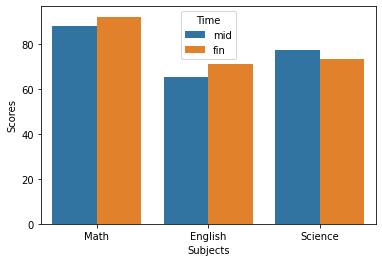

In [ ]:
import seaborn as sns
import pandas as pd

scores=pd.DataFrame({'Subjects':['Math','English','Science','Math','English','Science'],
                    'Scores':[88, 65, 77, 92, 71, 73],
                    'Time':['mid','mid','mid','fin','fin','fin']
                    })

sns.barplot(x='Subjects', y='Scores', hue='Time', data=scores)

## 부록: Streamlit-Echarts 활용

html로 완성된 차트를 매번 열어서 확인하는 번거로움을 덜어 주는 패키지입니다.

일일이 html파일을 열지 않아도 차트를 바로 확인할 수 있습니다.

[github 문서](https://github.com/andfanilo/streamlit-echarts)

* Colab에서 Streamlit을 사용하도록 하는 과정이 다소 복잡한 관계로, 코랩을 사용하는 이번 실습에서는 진행하지 않습니다.

주피터 등 다른 에디터를 통해 개인적으로 실행해 볼 것을 권장하며, 코랩을 사용할 경우 [구글링 결과](https://www.google.co.kr/search?q=streamlit+colab&sxsrf=ALiCzsZEgumiNKv0myPwwvbm97YcIhDfdA%3A1667487537227&source=hp&ei=MddjY8eIC5e12roP1fGJiAU&iflsig=AJiK0e8AAAAAY2PlQQyolBYD-_6P_HPyf7bHIr7UwbLS&ved=0ahUKEwiH5ciSo5L7AhWXmlYBHdV4AlEQ4dUDCAg&uact=5&oq=streamlit+colab&gs_lp=Egdnd3Mtd2l6uAED-AEBMgQQIxgnMgUQABiRAjIGEAAYFhgeMgUQABiGAzIFEAAYhgPCAgQQABhDwgILEC4YgAQYxwEY0QPCAgUQABiABMICCBAAGIAEGMsBSN8PUABYuA5wAHgAyAEAkAEAmAGKAaABpg6qAQQwLjE1&sclient=gws-wiz)를 참고하시면 됩니다.

In [ ]:
#설치: 설치 후 런타임 재시작 필요
!pip install streamlit-echarts

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from streamlit_echarts import st_pyecharts

bar = (
    Bar()
    .add_xaxis(["수학", "영어", "과학"])
    .add_yaxis("중간고사 점수", [88, 65, 77])
    .add_yaxis("기말고사 점수", [92,71,73])
    .set_global_opts(title_opts=opts.TitleOpts(title="2학기 시험 결과"))
)
st_pyecharts(bar, key="echarts")

# 고급 시각화
지금부터 `pyecharts`가 갖고 있는 방대한 시각화 기능들을 살펴보겠습니다.

최신 버전의 공식 문서는 아직까지 제공되지 않는 것으로 보입니다.

(업데이트 노트가 모드 중국어로 작성되어 있어 확인이 어렵습니다ㅜㅜ)

우선 대부분의 시각화가 가능한 `0.5.11` 버전으로 실습을 진행하겠습니다.

구글링 시 나오는 문서에는 간혹 `0.1.9.5`버전을 사용하는 경우도 있으니 참고 바랍니다.

버전이 변경될 경우 **런타임을 재시작**해 주세요. 재시작 후에는 **바로 다음 셀로 넘어가면** 됩니다.

In [ ]:
!pip install pyecharts==0.5.11
#!pip install pyecharts== 0.1.9.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyecharts-0.5.11-py2.py3-none-any.whl (122 kB)
  Attempting uninstall: pyecharts
    Found existing installation: pyecharts 1.9.1
    Uninstalling pyecharts-1.9.1:
      Successfully uninstalled pyecharts-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit-echarts 0.1.0 requires pyecharts>=1.8, but you have pyecharts 0.5.11 which is incompatible.


## 막대그래프 ★

**Chart 01. 막대그래프 / 평균 마커 / 최소 및 최대 라인**
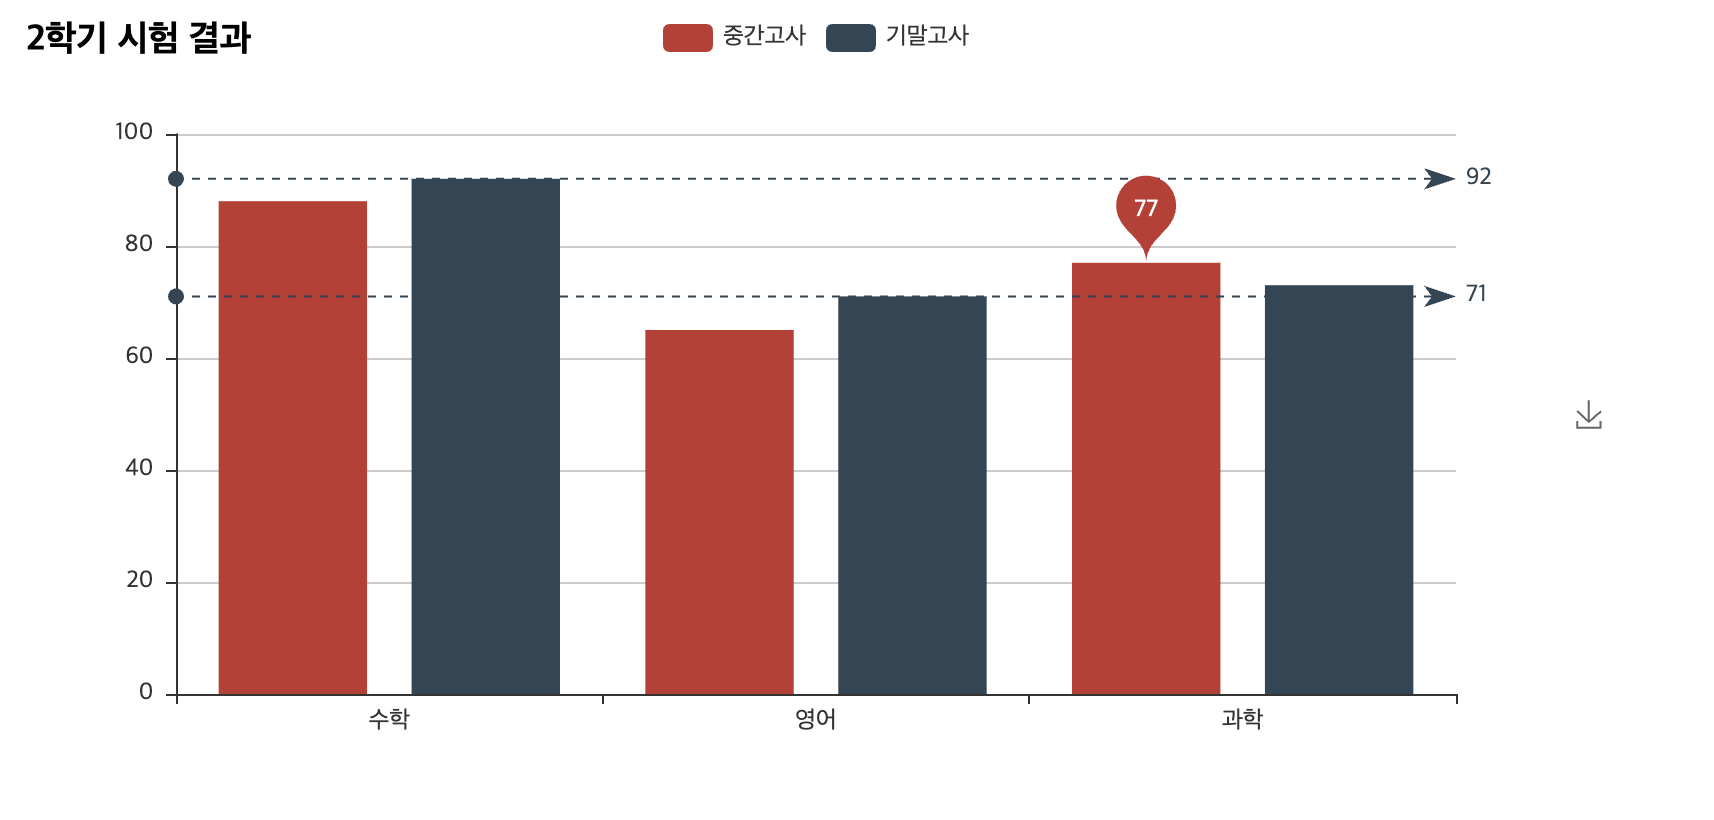

In [ ]:
from pyecharts import Bar

#사용할 데이터 생성
attr = ["수학", "영어", "과학",]
v1 = [88, 65, 77]
v2 = [92, 71, 73]

bar = Bar("2학기 시험 결과") #제목
bar.add("중간고사", attr, v1, mark_point=["average"]) #중간고사에는 평균 마커 표시
bar.add("기말고사", attr, v2, mark_line=["min", "max"]) #기말고사에는 최소, 최대 점수 선 표시

bar.render("Chart 01.html")

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


**Chart 02. 막대그래프 / 데이터 줌 및 슬라이드 기능**

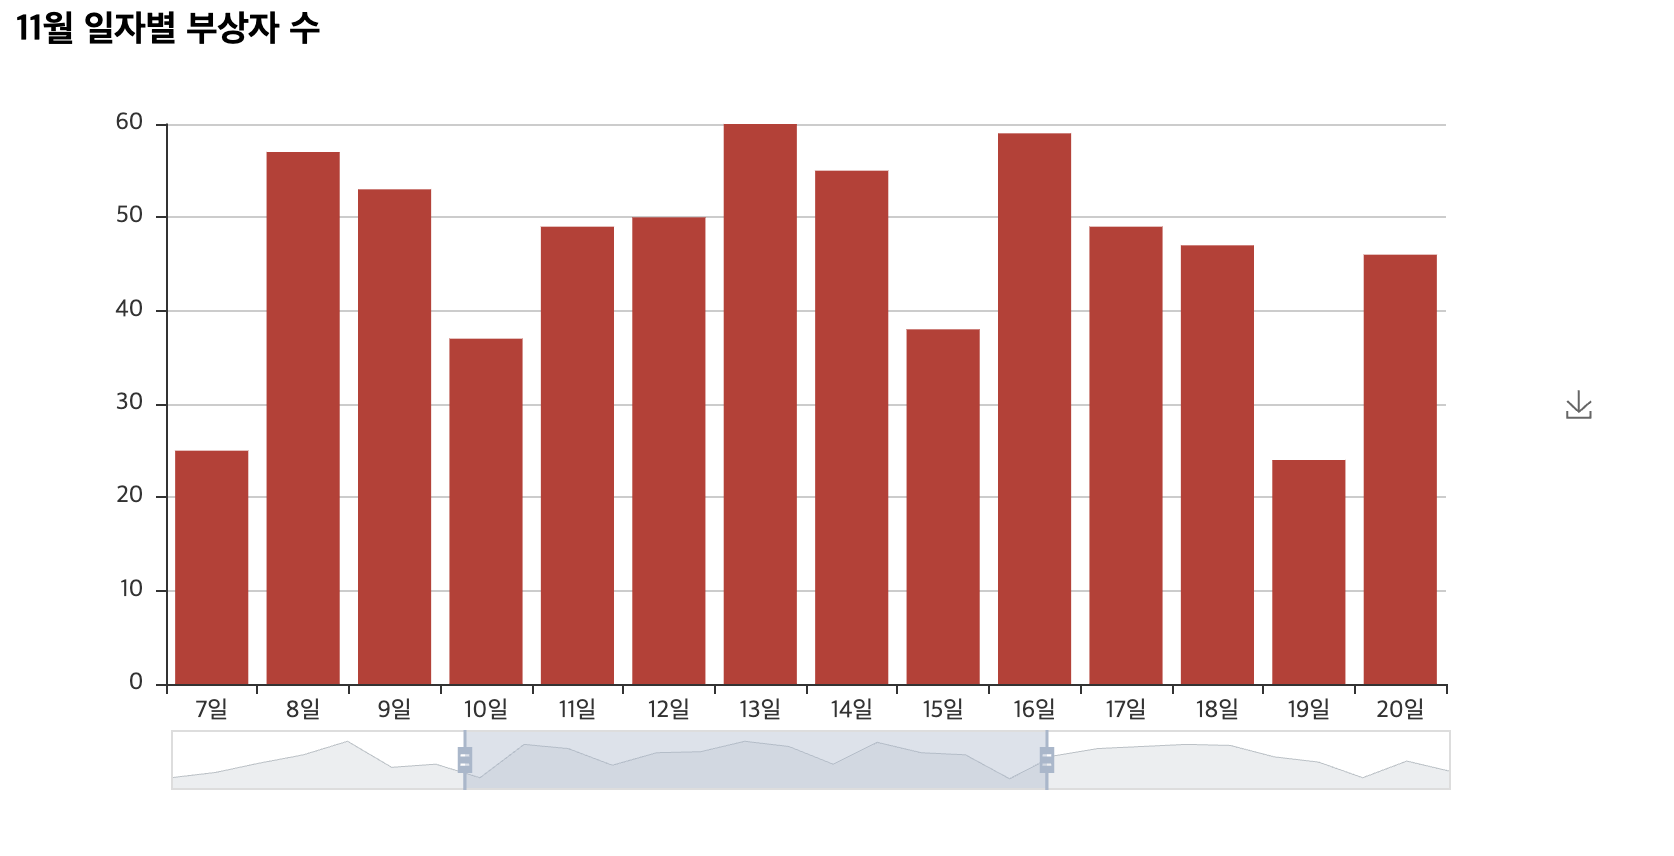



In [ ]:
import random
attr = ["{}일".format(i) for i in range(30)] #날짜 데이터
v1 = [random.randint(22, 60) for _ in range(30)] #일자별 랜덤값

bar = Bar("11월 일자별 부상자 수") #유형 및 개체명 설정
bar.add(
    "",
    attr,
    v1,
    is_datazoom_show=True, #줌 조절기 표시
    datazoom_type="both", #줌과 슬라이드 모두 허용
    datazoom_range=[10, 25], #줌 범위 설정
)

bar.render("Chart 02.html")

*(Chart 03 삭제)*

## 3차원 막대그래프
3차원 값이 필요하므로 [x,y,z]형태의 값을 여러 개 넣어 주시면 됩니다.

In [ ]:
data = [[0, 0, 5], [0, 1, 1], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0], [0, 6, 0], [0, 7, 0],
        [0, 8, 0],[0, 9, 0], [0, 10, 0], [0, 11, 2], [0, 12, 4], [0, 13, 1], [0, 14, 1], [0, 15, 3],
        [0, 16, 4], [0, 17, 6], [0, 18, 4], [0, 19, 4], [0, 20, 3], [0, 21, 3], [0, 22, 2], [0, 23, 5],
        [1, 0, 7], [1, 1, 0], [1, 2, 0], [1, 3, 0], [1, 4, 0], [1, 5, 0], [1, 6, 0], [1, 7, 0], [1, 8, 0],
        [1, 9, 0], [1, 10, 5], [1, 11, 2], [1, 12, 2], [1, 13, 6], [1, 14, 9], [1, 15, 11], [1, 16, 6], [1, 17, 7],
        [1, 18, 8], [1, 19, 12], [1, 20, 5], [1, 21, 5], [1, 22, 7], [1, 23, 2], [2, 0, 1], [2, 1, 1],
        [2, 2, 0], [2, 3, 0], [2, 4, 0], [2, 5, 0], [2, 6, 0], [2, 7, 0], [2, 8, 0], [2, 9, 0], [2, 10, 3],
        [2, 11, 2], [2, 12, 1], [2, 13, 9], [2, 14, 8], [2, 15, 10], [2, 16, 6], [2, 17, 5], [2, 18, 5],
        [2, 19, 5], [2, 20, 7], [2, 21, 4], [2, 22, 2], [2, 23, 4], [3, 0, 7], [3, 1, 3], [3, 2, 0], [3, 3, 0],
        [3, 4, 0], [3, 5, 0], [3, 6, 0], [3, 7, 0], [3, 8, 1], [3, 9, 0], [3, 10, 5], [3, 11, 4], [3, 12, 7],
        [3, 13, 14], [3, 14, 13], [3, 15, 12], [3, 16, 9], [3, 17, 5], [3, 18, 5], [3, 19, 10], [3, 20, 6],
        [3, 21, 4], [3, 22, 4], [3, 23, 1], [4, 0, 1], [4, 1, 3], [4, 2, 0], [4, 3, 0], [4, 4, 0], [4, 5, 1],
        [4, 6, 0], [4, 7, 0], [4, 8, 0], [4, 9, 2], [4, 10, 4], [4, 11, 4], [4, 12, 2], [4, 13, 4], [4, 14, 4],
        [4, 15, 14], [4, 16, 12], [4, 17, 1], [4, 18, 8], [4, 19, 5], [4, 20, 3], [4, 21, 7], [4, 22, 3],
        [4, 23, 0], [5, 0, 2], [5, 1, 1], [5, 2, 0], [5, 3, 3], [5, 4, 0], [5, 5, 0], [5, 6, 0], [5, 7, 0],
        [5, 8, 2], [5, 9, 0], [5, 10, 4], [5, 11, 1], [5, 12, 5], [5, 13, 10], [5, 14, 5], [5, 15, 7], [5, 16, 11],
        [5, 17, 6], [5, 18, 0], [5, 19, 5], [5, 20, 3], [5, 21, 4], [5, 22, 2], [5, 23, 0], [6, 0, 1], [6, 1, 0],
        [6, 2, 0], [6, 3, 0], [6, 4, 0], [6, 5, 0], [6, 6, 0], [6, 7, 0], [6, 8, 0], [6, 9, 0], [6, 10, 1],
        [6, 11, 0], [6, 12, 2], [6, 13, 1], [6, 14, 3], [6, 15, 4], [6, 16, 0], [6, 17, 0], [6, 18, 0], [6, 19, 0],
        [6, 20, 1], [6, 21, 2], [6, 22, 2], [6, 23, 6]]

**Chart 04. 그림자 옵션 및 회전 옵션을 포함한 막대그래프**

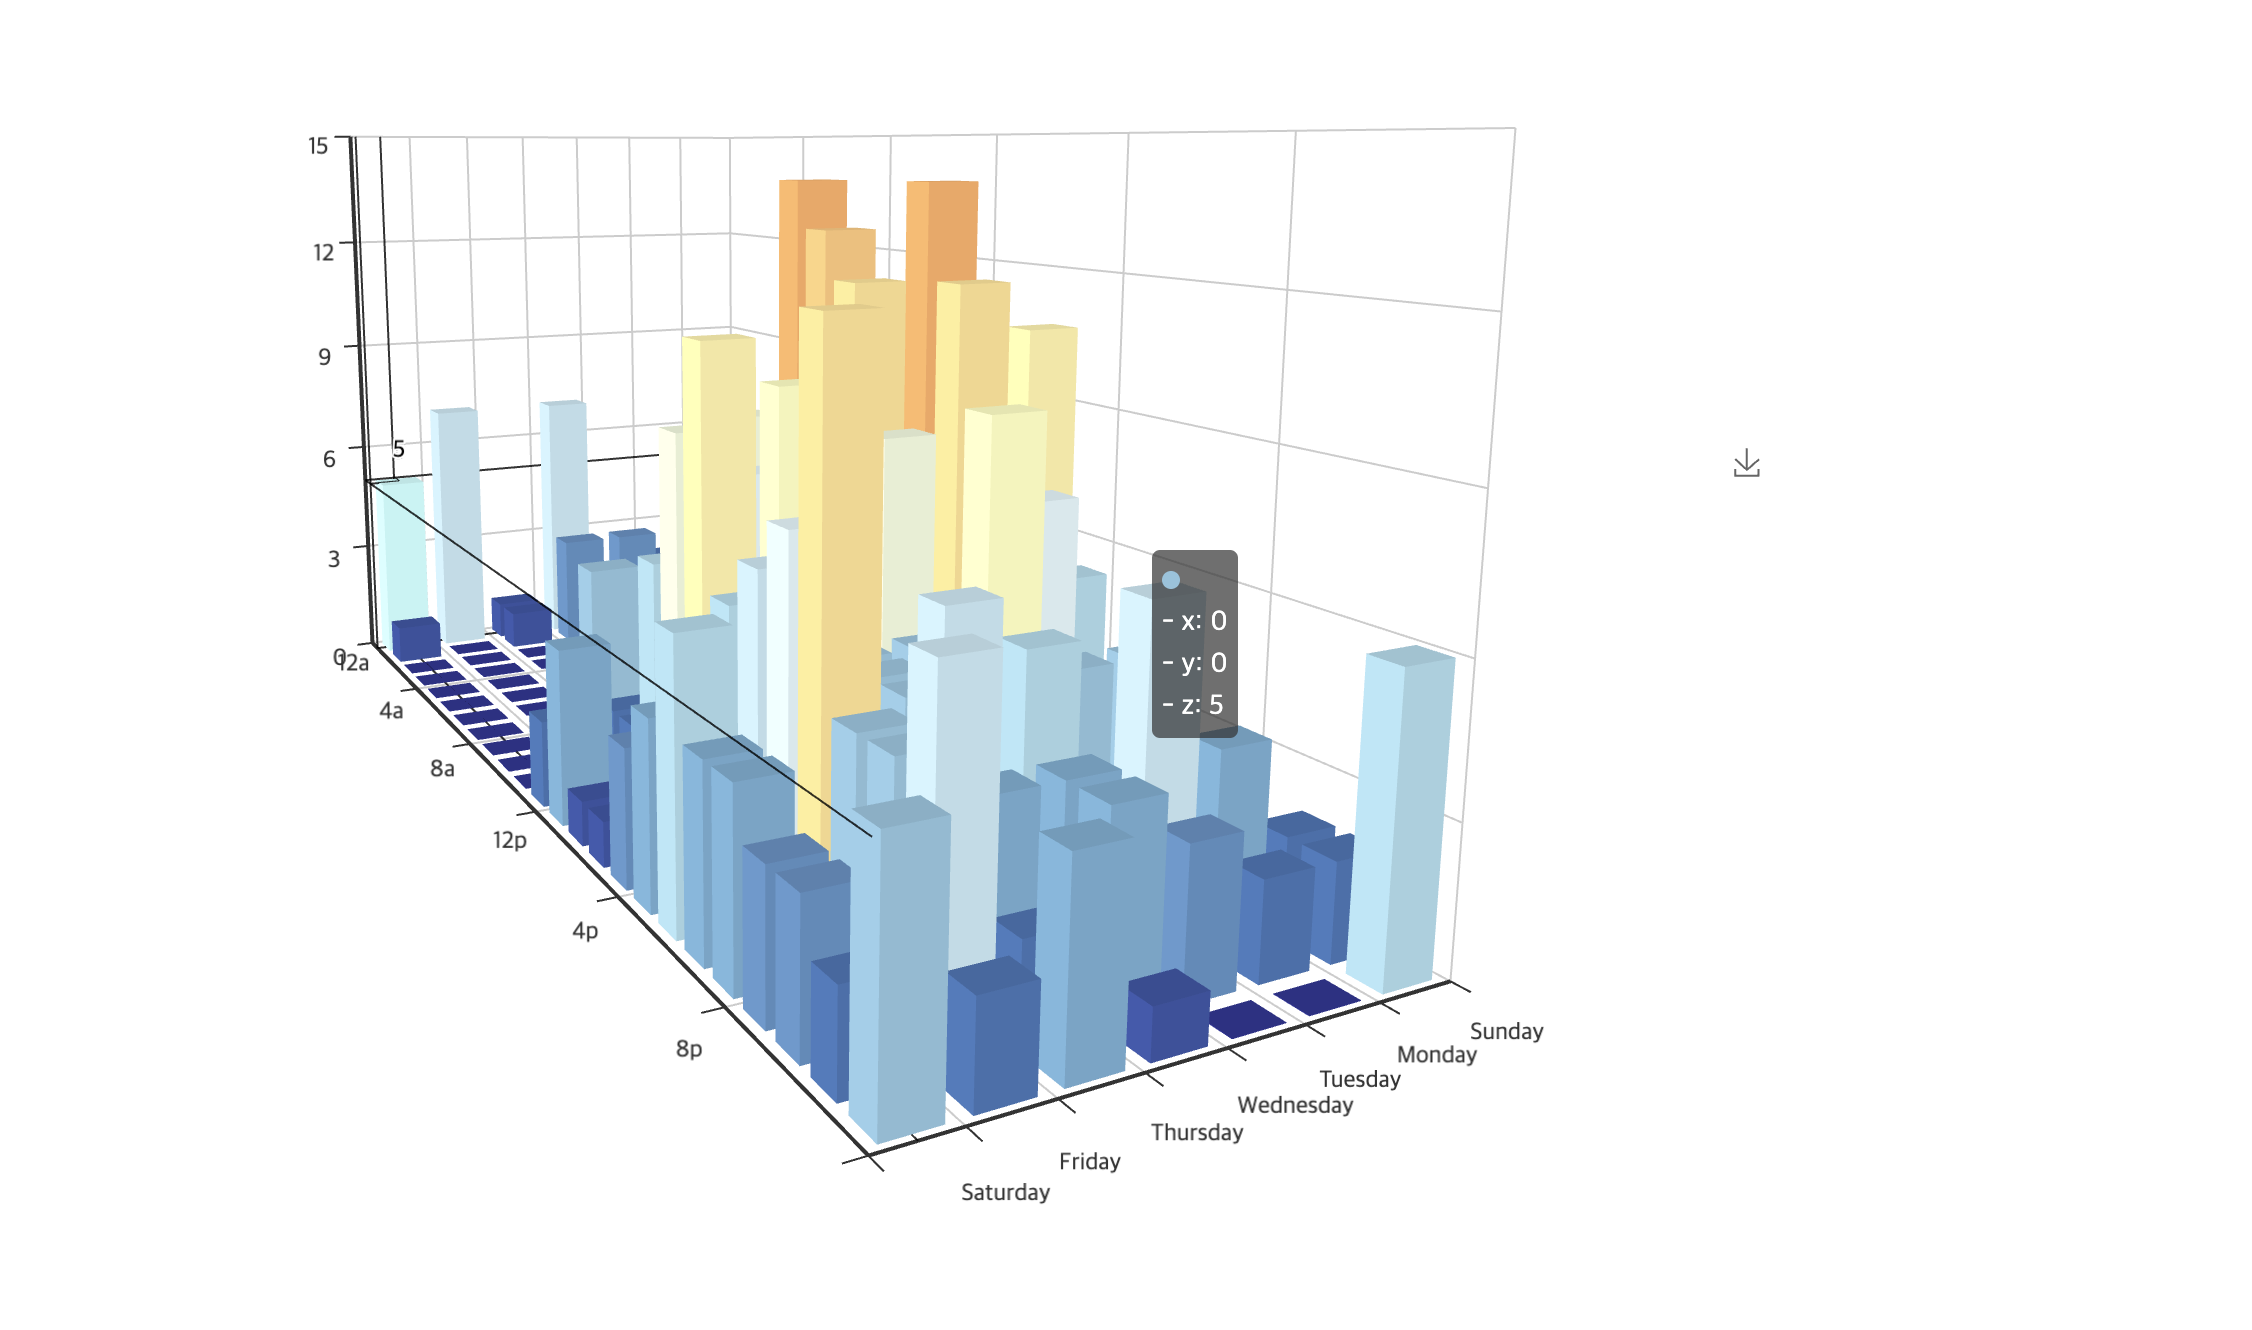

In [ ]:
from pyecharts import Bar3D #3차원 막대그래프 패키지 호출

bar3d = Bar3D("3D Graph", width=1000, height=800) #그래프 사이즈 설정
x_axis = ["12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
          "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"] #x축
y_axis = ["Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"] #y축

range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026'] #사용할 컬러

bar3d.add("", x_axis, y_axis, [[d[1], d[0], d[2]] for d in data],
          is_visualmap=True,
          visual_range=[0, 20],
          visual_range_color=range_color, #컬러 지정
          grid3D_width=200, grid3D_depth=80, #그리드 사이즈
          is_grid3D_rotate=True, grid3D_rotate_speed=60, #회전 옵션
          grid3D_shading='lambert' #그림자 유형
          )

bar3d.render('Chart 04.html')

## Effect-Scatter Plot ★
시각 효과가 가미된 산점도

**Chart 05. effect scatter plot (물결 효과가 나타나는 산점도)**

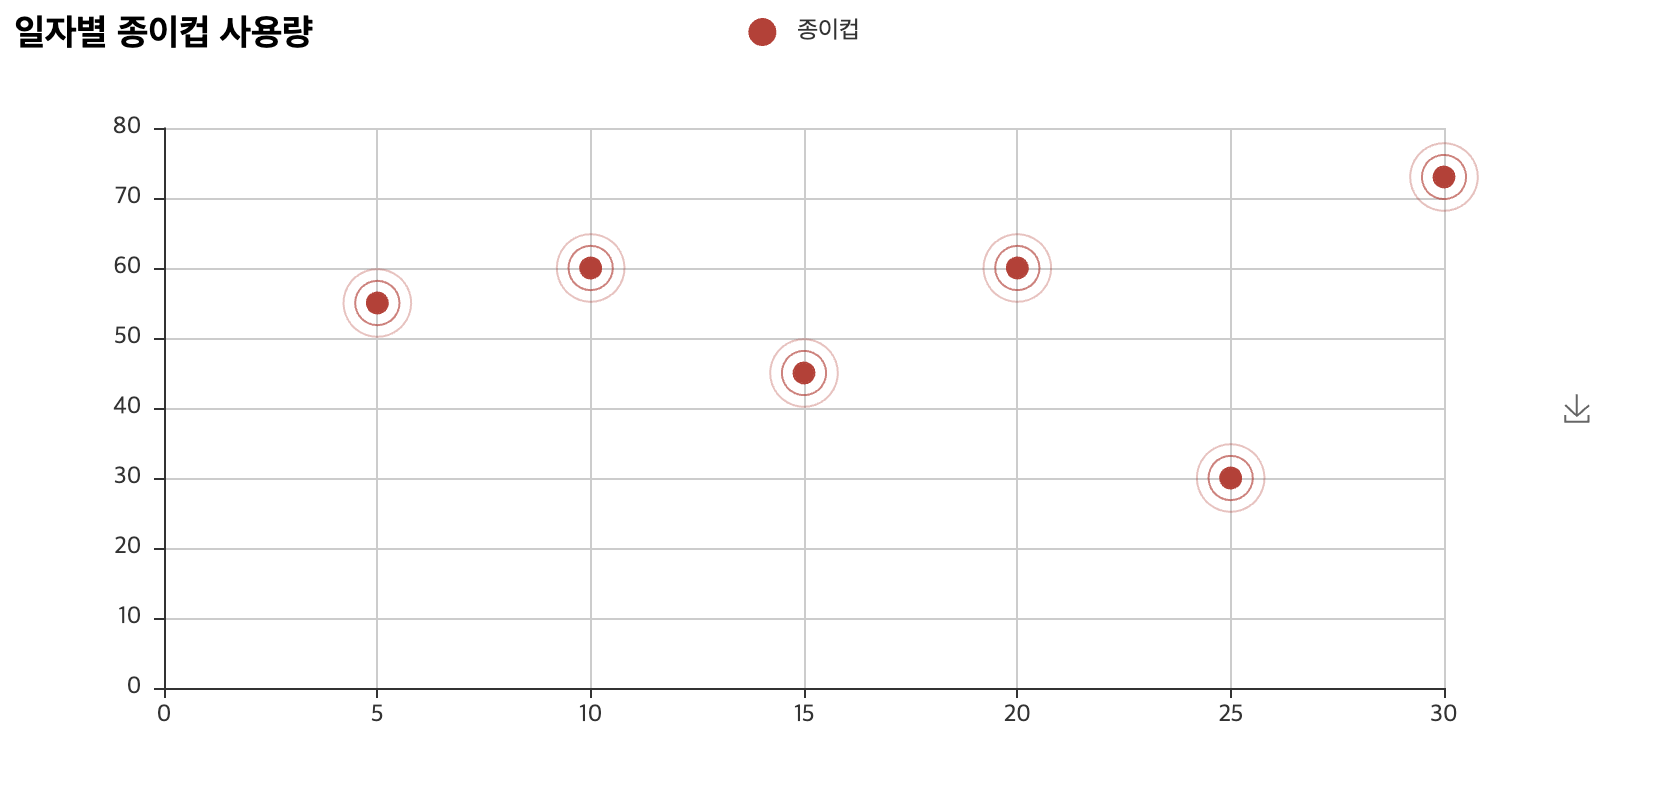

In [ ]:
from pyecharts import EffectScatter

v1 = [5, 10, 15, 20, 25, 30] #x축 값
v2 = [55, 60, 45, 60, 30, 73] #y축 값
es = EffectScatter("일자별 종이컵 사용량") #유형 및 개체명 설정
es.add("종이컵", v1, v2,
       effect_scale=4.5, effect_period=3) #효과 옵션 설정
es.render('Chart 05.html')

## 맵 차트

**Chart 06. 히트맵 타입의 맵 차트**

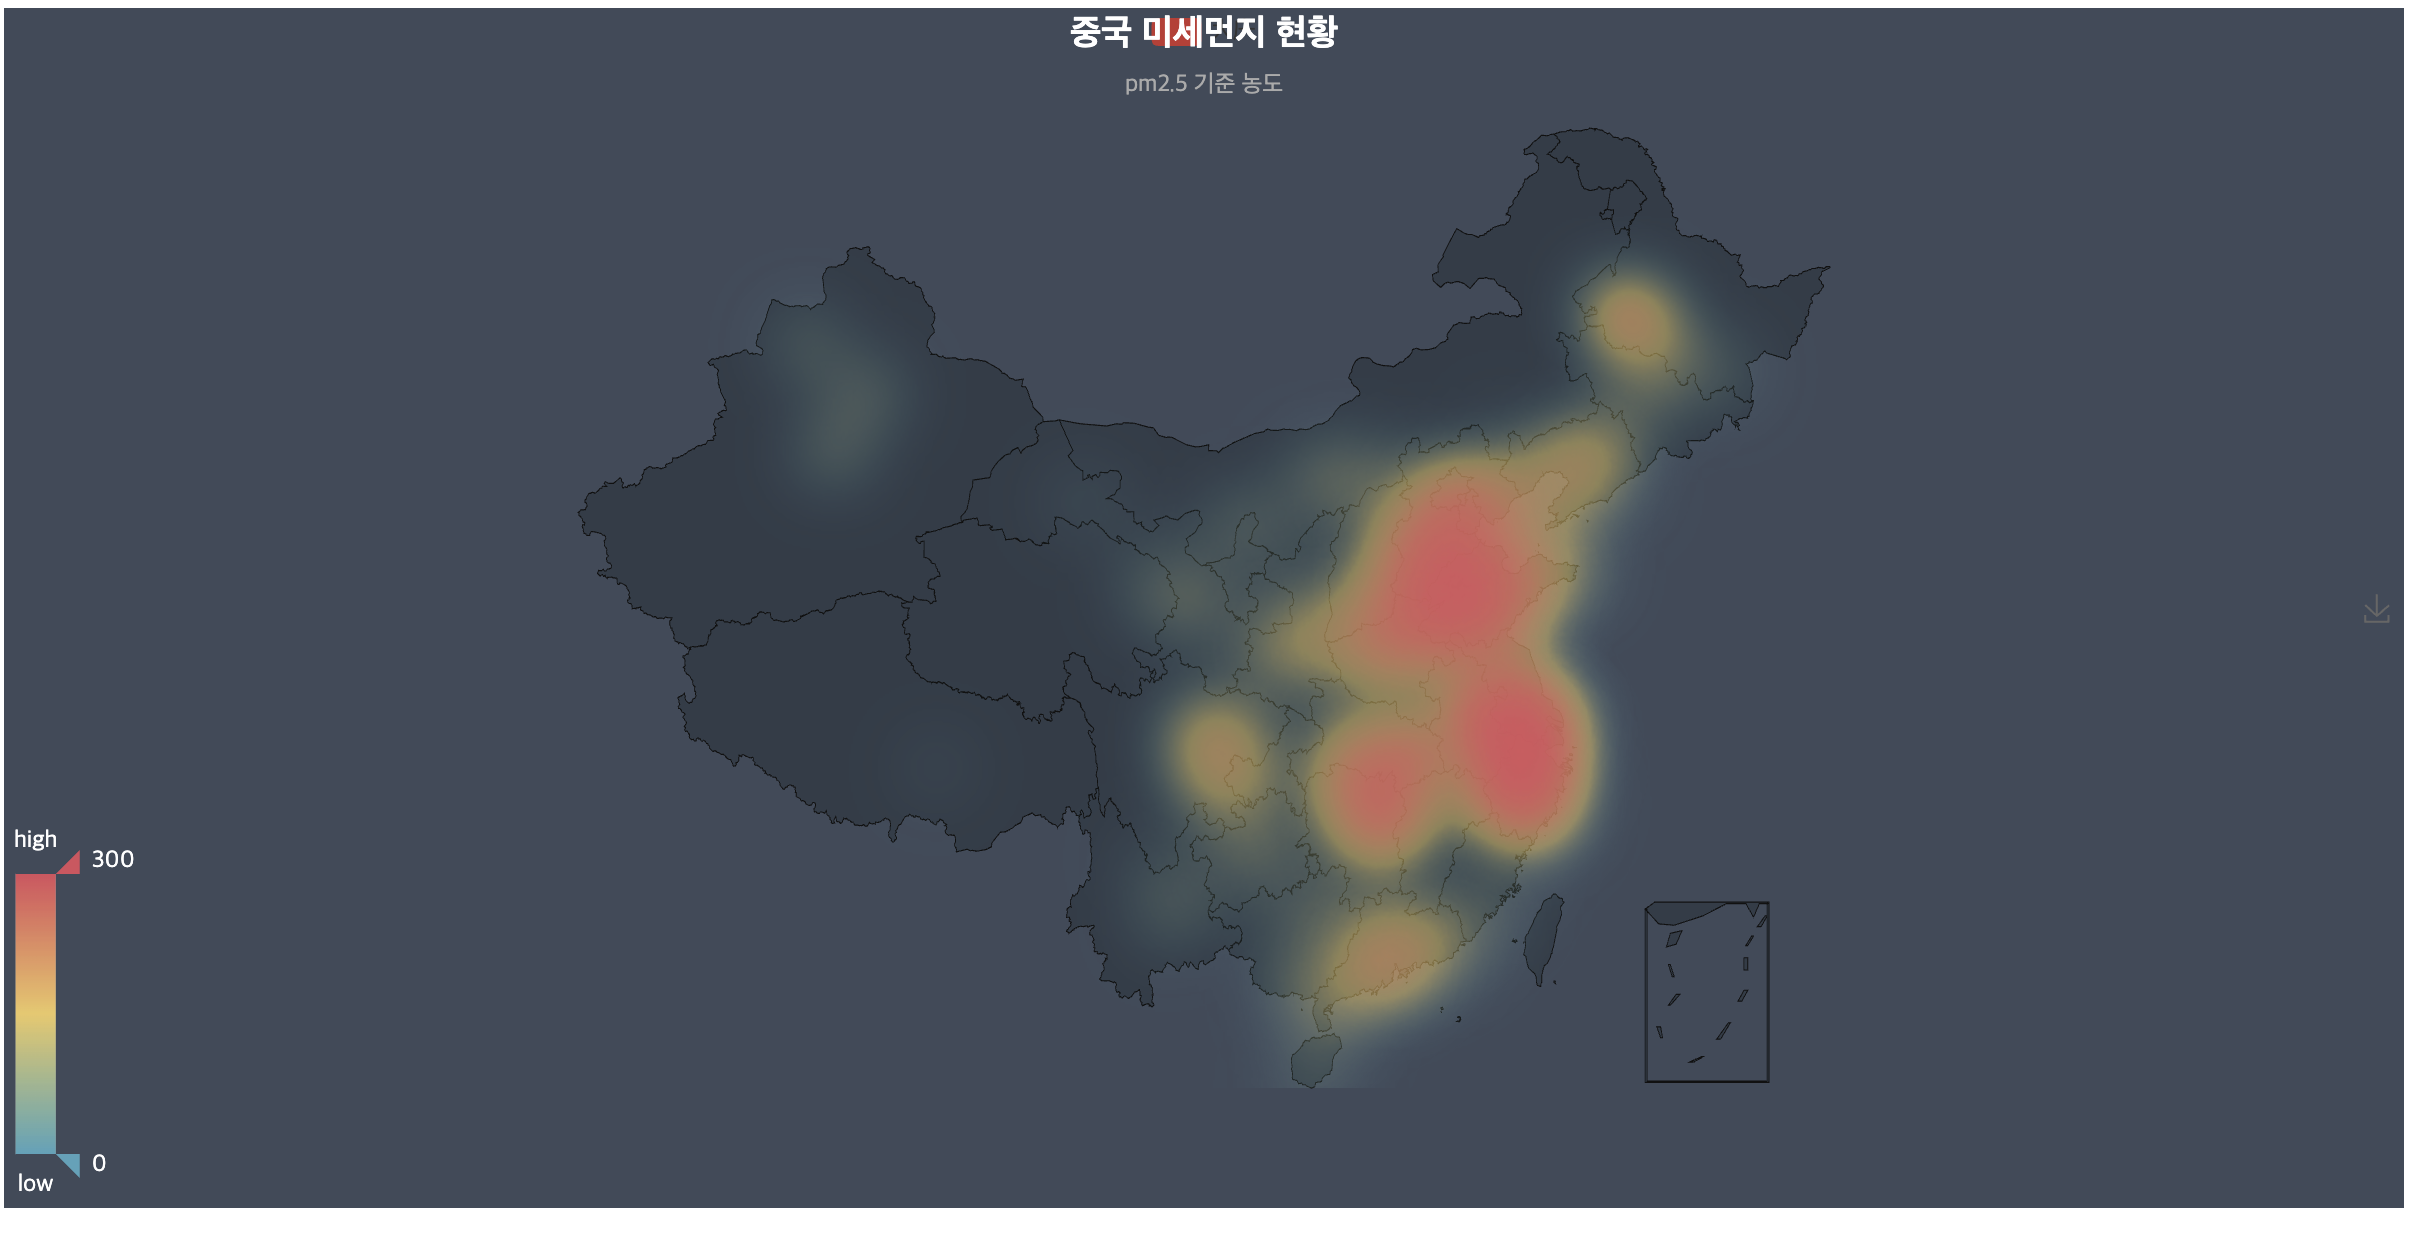


In [ ]:
from pyecharts import Geo

data = [
    ("海门", 9),("鄂尔多斯", 12),("招远", 12),("舟山", 12),("齐齐哈尔", 14),("盐城", 15),
    ("赤峰", 16),("青岛", 18),("乳山", 18),("金昌", 19),("泉州", 21),("莱西", 21),
    ("日照", 21),("胶南", 22),("南通", 23),("拉萨", 24),("云浮", 24),("梅州", 25),
    ("文登", 25),("上海", 25),("攀枝花", 25),("威海", 25),("承德", 25),("厦门", 26),
    ("汕尾", 26),("潮州", 26),("丹东", 27),("太仓", 27),("曲靖", 27),("烟台", 28),
    ("福州", 29),("瓦房店", 30),("即墨", 30),("抚顺", 31),("玉溪", 31),("张家口", 31),
    ("阳泉", 31),("莱州", 32),("湖州", 32),("汕头", 32),("昆山", 33),("宁波", 33),
    ("湛江", 33),("揭阳", 34),("荣成", 34),("连云港", 35),("葫芦岛", 35),("常熟", 36),
    ("东莞", 36),("河源", 36),("淮安", 36),("泰州", 36),("南宁", 37),("营口", 37),
    ("惠州", 37),("江阴", 37),("蓬莱", 37),("韶关", 38),("嘉峪关", 38),("广州", 38),
    ("延安", 38),("太原", 39),("清远", 39),("中山", 39),("昆明", 39),("寿光", 40),
    ("盘锦", 40),("长治", 41),("深圳", 41),("珠海", 42),("宿迁", 43),("咸阳", 43),
    ("铜川", 44),("平度", 44),("佛山", 44),("海口", 44),("江门", 45),("章丘", 45),
    ("肇庆", 46),("大连", 47),("临汾", 47),("吴江", 47),("石嘴山", 49),("沈阳", 50),
    ("苏州", 50),("茂名", 50),("嘉兴", 51),("长春", 51),("胶州", 52),("银川", 52),
    ("张家港", 52),("三门峡", 53),("锦州", 54),("南昌", 54),("柳州", 54),("三亚", 54),
    ("自贡", 56),("吉林", 56),("阳江", 57),("泸州", 57),("西宁", 57),("宜宾", 58),
    ("呼和浩特", 58),("成都", 58),("大同", 58),("镇江", 59),("桂林", 59),("张家界", 59),
    ("宜兴", 59),("北海", 60),("西安", 61),("金坛", 62),("东营", 62),("牡丹江", 63),
    ("遵义", 63),("绍兴", 63),("扬州", 64),("常州", 64),("潍坊", 65),("重庆", 66),
    ("台州", 67),("南京", 67),("滨州", 70),("贵阳", 71),("无锡", 71),("本溪", 71),
    ("克拉玛依", 72),("渭南", 72),("马鞍山", 72),("宝鸡", 72),("焦作", 75),("句容", 75),
    ("北京", 79),("徐州", 79),("衡水", 80),("包头", 80),("绵阳", 80),("乌鲁木齐", 84),
    ("枣庄", 84),("杭州", 84),("淄博", 85),("鞍山", 86),("溧阳", 86),("库尔勒", 86),
    ("安阳", 90),("开封", 90),("济南", 92),("德阳", 93),("温州", 95),("九江", 96),
    ("邯郸", 98),("临安", 99),("兰州", 99),("沧州", 100),("临沂", 103),("南充", 104),
    ("天津", 105),("富阳", 106),("泰安", 112),("诸暨", 112),("郑州", 113),("哈尔滨", 114),
    ("聊城", 116),("芜湖", 117),("唐山", 119),("平顶山", 119),("邢台", 119),("德州", 120),
    ("济宁", 120),("荆州", 127),("宜昌", 130),("义乌", 132),("丽水", 133),("洛阳", 134),
    ("秦皇岛", 136),("株洲", 143),("石家庄", 147),("莱芜", 148),("常德", 152),("保定", 153),
    ("湘潭", 154),("金华", 157),("岳阳", 169),("长沙", 175),("衢州", 177),("廊坊", 193),
    ("菏泽", 194),("合肥", 229),("武汉", 273),("大庆", 279)]


geo = Geo("중국 미세먼지 현황", "pm2.5 기준 농도", title_color="#fff",
          title_pos="center", width=1200,
          height=600, background_color='#404a59')
attr, value = geo.cast(data)
geo.add("", attr, value, type="heatmap", is_visualmap=True, visual_range=[0, 300],
        visual_text_color='#fff')

geo.render('Chart 06.html')

참고: 맵 기본값은 중국으로 되어 있습니다.

타 지역의 맵을 사용해야 할 경우 `geo.add()` 함수 안에 `maptype="英国"`과 같이 파라미터 설정을 통해 맵을 변경할 수 있습니다.



*(Chart 07 삭제)*

## 히트맵
  **Chart 08. 히트맵**
  
  Heat map은 표와 유사한 형태를 띄나 값이 아닌 색상으로 표현한다는 특징이 있습니다.

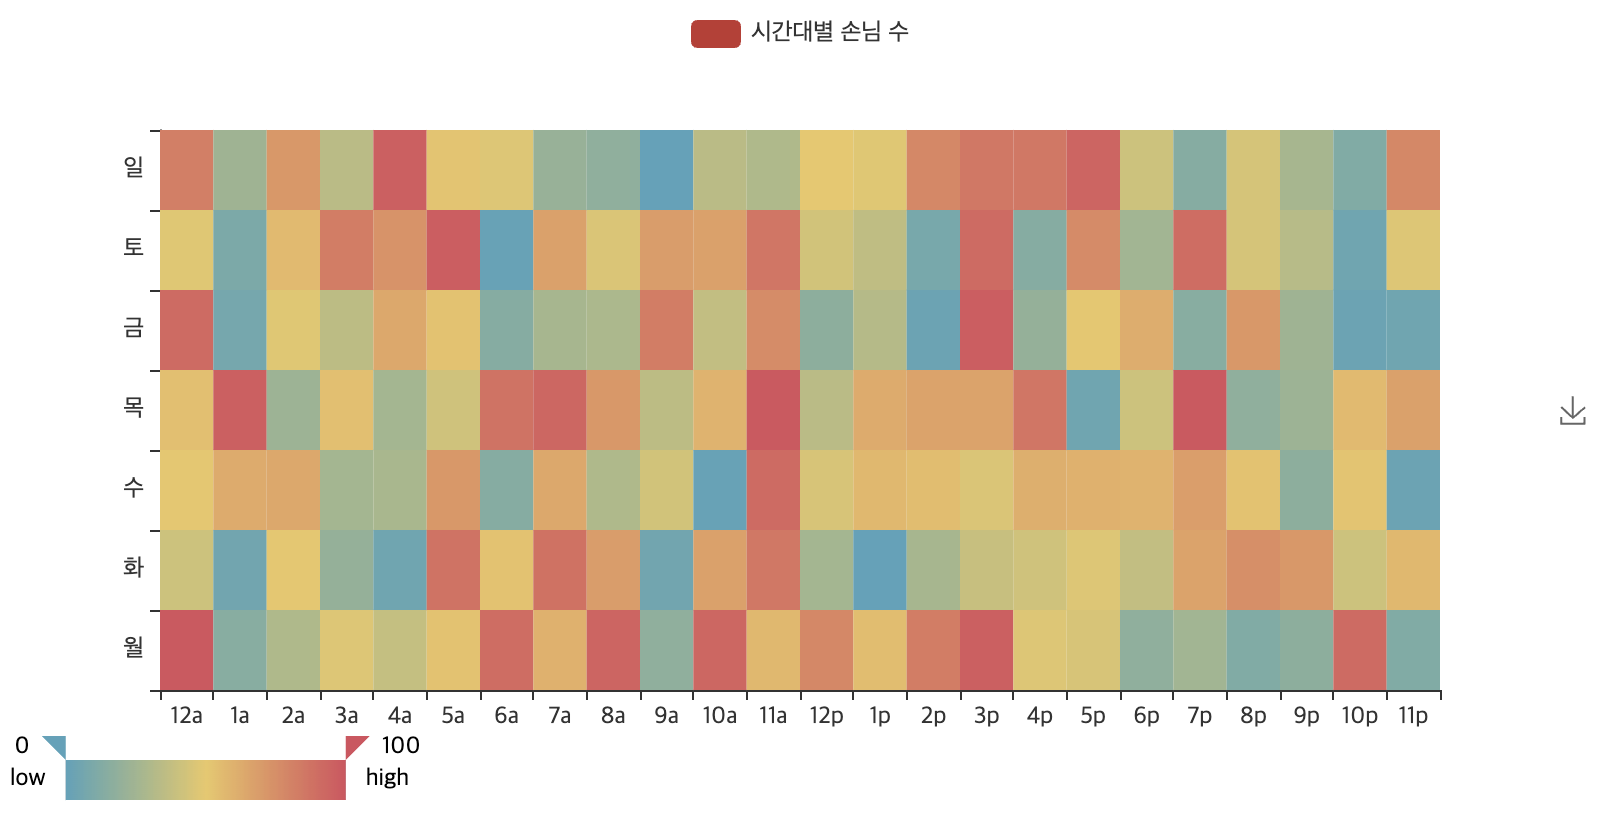

In [ ]:
import random
from pyecharts import HeatMap

x_axis = [
    "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
    "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"] #x축
y_axis = [
    "월", "화", "수", "목", "금", "토", "일"] #y축
data = [[i, j, random.randint(0, 100)] for i in range(24) for j in range(7)] #각각의 값은 난수로 생성하겠습니다.
heatmap = HeatMap()
heatmap.add(
    "시간대별 손님 수",
    x_axis,
    y_axis,
    data,
    is_visualmap=True,
    visual_text_color="#000",
    visual_orient="horizontal",
)
heatmap.render('Chart 08.html')

## 캔들스틱
캔들스틱은 특정 시간동안 재화의 가격 변화를 나타내는 그래프입니다.
하나의 '시간 단위' 동안의 '가격'이 하나의 캔들에 대응됩니다.

캔들스틱 읽는 법은 다음과 같습니다.
* **시가**: 캔들의 시작 가격
* **종가**: 캔들의 종료 가격
* **고가**: 캔들 내 최고가
* **저가**: 캔들 내 최저가
* **양봉**(빨간색): 시가<종가인 경우
* **음봉**(파란색): 시가>종가인 경우

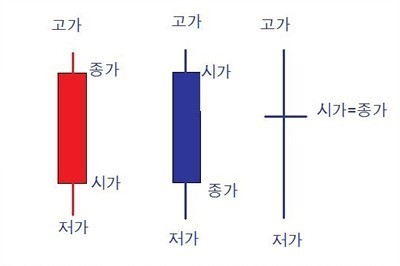

**Chart 09. 캔들스틱**
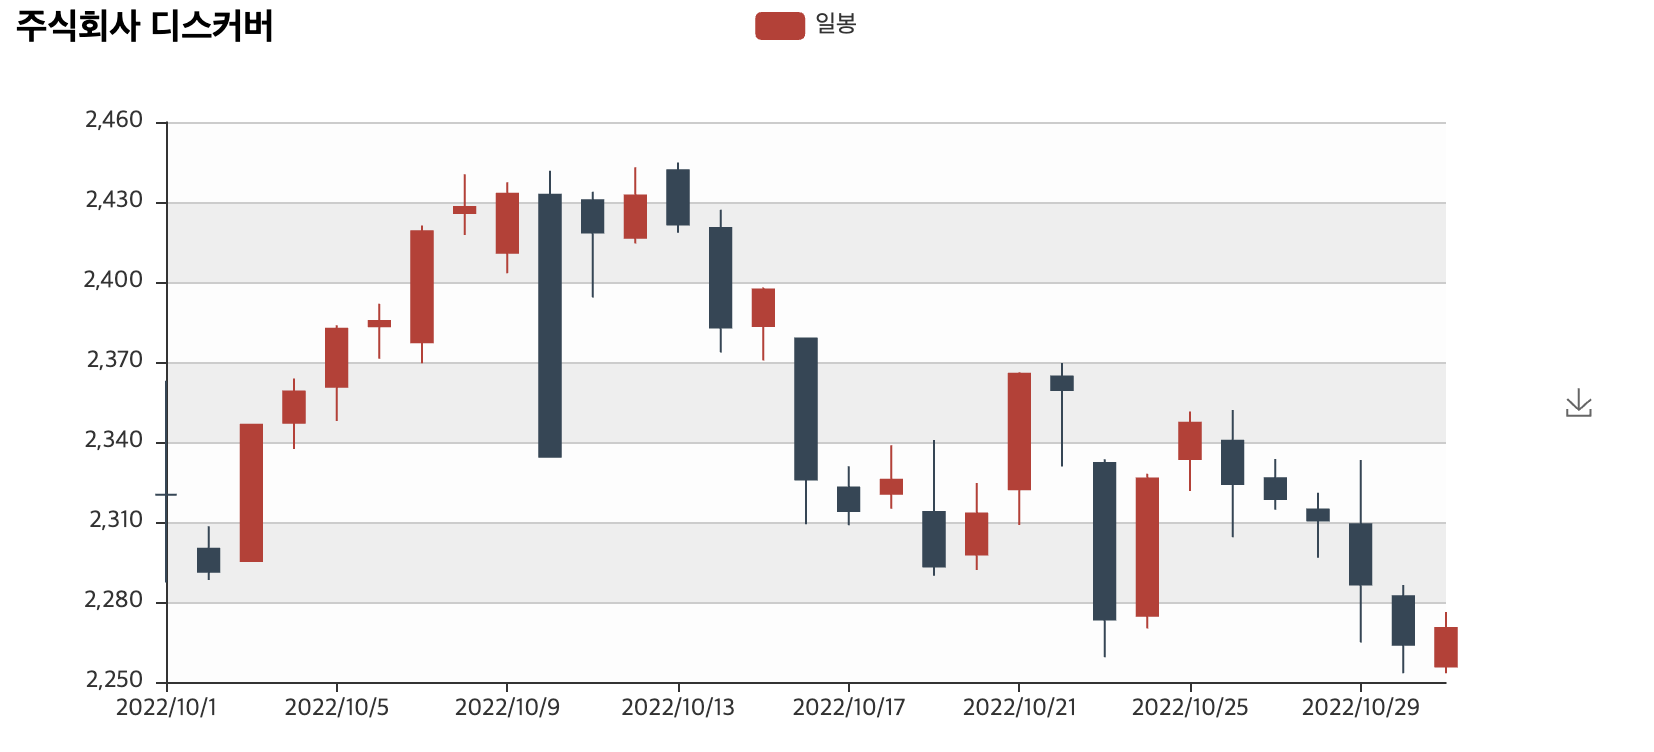

하나의 캔들을 이루는 데이터셋은 [시가, 종가, 저가, 고가]로 구성하면 됩니다.


In [ ]:
from pyecharts import Kline

v1 = [[2320.26, 2320.26, 2287.3, 2362.94], [2300, 2291.3, 2288.26, 2308.38],
      [2295.35, 2346.5, 2295.35, 2345.92], [2347.22, 2358.98, 2337.35, 2363.8],
      [2360.75, 2382.48, 2347.89, 2383.76], [2383.43, 2385.42, 2371.23, 2391.82],
      [2377.41, 2419.02, 2369.57, 2421.15], [2425.92, 2428.15, 2417.58, 2440.38],
      [2411, 2433.13, 2403.3, 2437.42], [2432.68, 2334.48, 2427.7, 2441.73],
      [2430.69, 2418.53, 2394.22, 2433.89], [2416.62, 2432.4, 2414.4, 2443.03],
      [2441.91, 2421.56, 2418.43, 2444.8], [2420.26, 2382.91, 2373.53, 2427.07],
      [2383.49, 2397.18, 2370.61, 2397.94], [2378.82, 2325.95, 2309.17, 2378.82],
      [2322.94, 2314.16, 2308.76, 2330.88], [2320.62, 2325.82, 2315.01, 2338.78],
      [2313.74, 2293.34, 2289.89, 2340.71], [2297.77, 2313.22, 2292.03, 2324.63],
      [2322.32, 2365.59, 2308.92, 2366.16], [2364.54, 2359.51, 2330.86, 2369.65],
      [2332.08, 2273.4, 2259.25, 2333.54], [2274.81, 2326.31, 2270.1, 2328.14],
      [2333.61, 2347.18, 2321.6, 2351.44], [2340.44, 2324.29, 2304.27, 2352.02],
      [2326.42, 2318.61, 2314.59, 2333.67], [2314.68, 2310.59, 2296.58, 2320.96],
      [2309.16, 2286.6, 2264.83, 2333.29], [2282.17, 2263.97, 2253.25, 2286.33],
      [2255.77, 2270.28, 2253.31, 2276.22]]

kline = Kline("주식회사 디스커버")
kline.add("일봉", ["2022/10/{}".format(i + 1) for i in range(31)], v1) #'일봉'은 캔들 하나가 의미하는 기간이 1일이라는 뜻입니다.
kline.render('Chart 09.html')

## 선 그래프 ★

**Chart 10. 값 2개 라인 그래프**
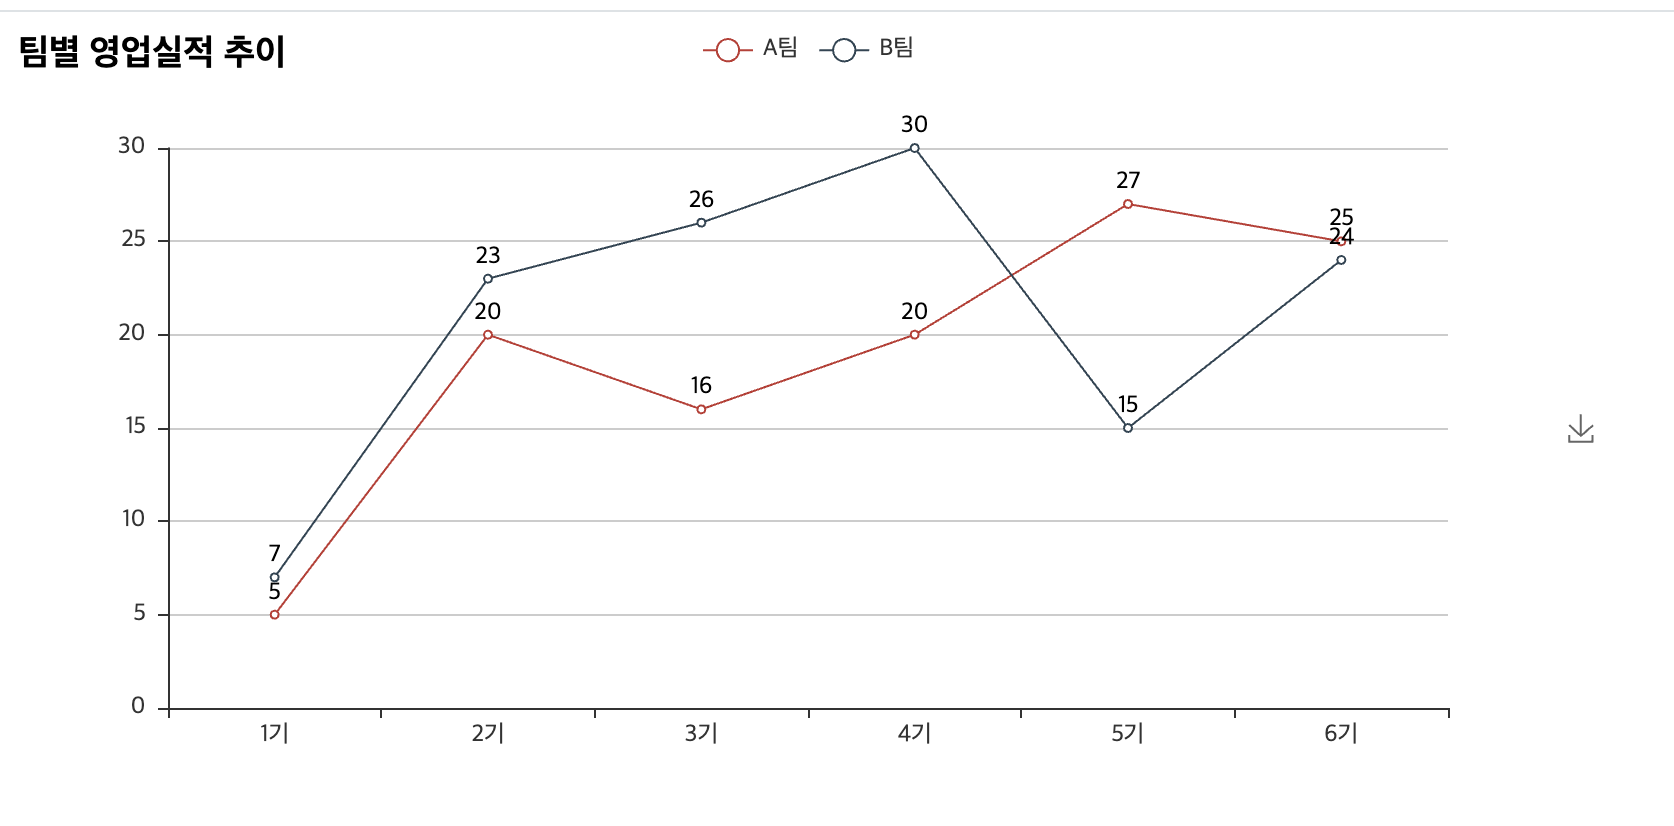

In [ ]:
from pyecharts import Line

attr = ["1기", "2기", "3기", "4기", "5기", "6기"]
v1 = [5, 20, 16, 20, 27, 25]
v2 = [7, 23, 26, 30, 15, 24]
line = Line("팀별 영업실적 추이")
line.add("A팀", attr, v1, is_label_show=True)
line.add("B팀", attr, v2, is_label_show=True)
line.render('Chart 10.html')

**Chart 11. 아래쪽 영역 채색 + 스택 옵션 적용**
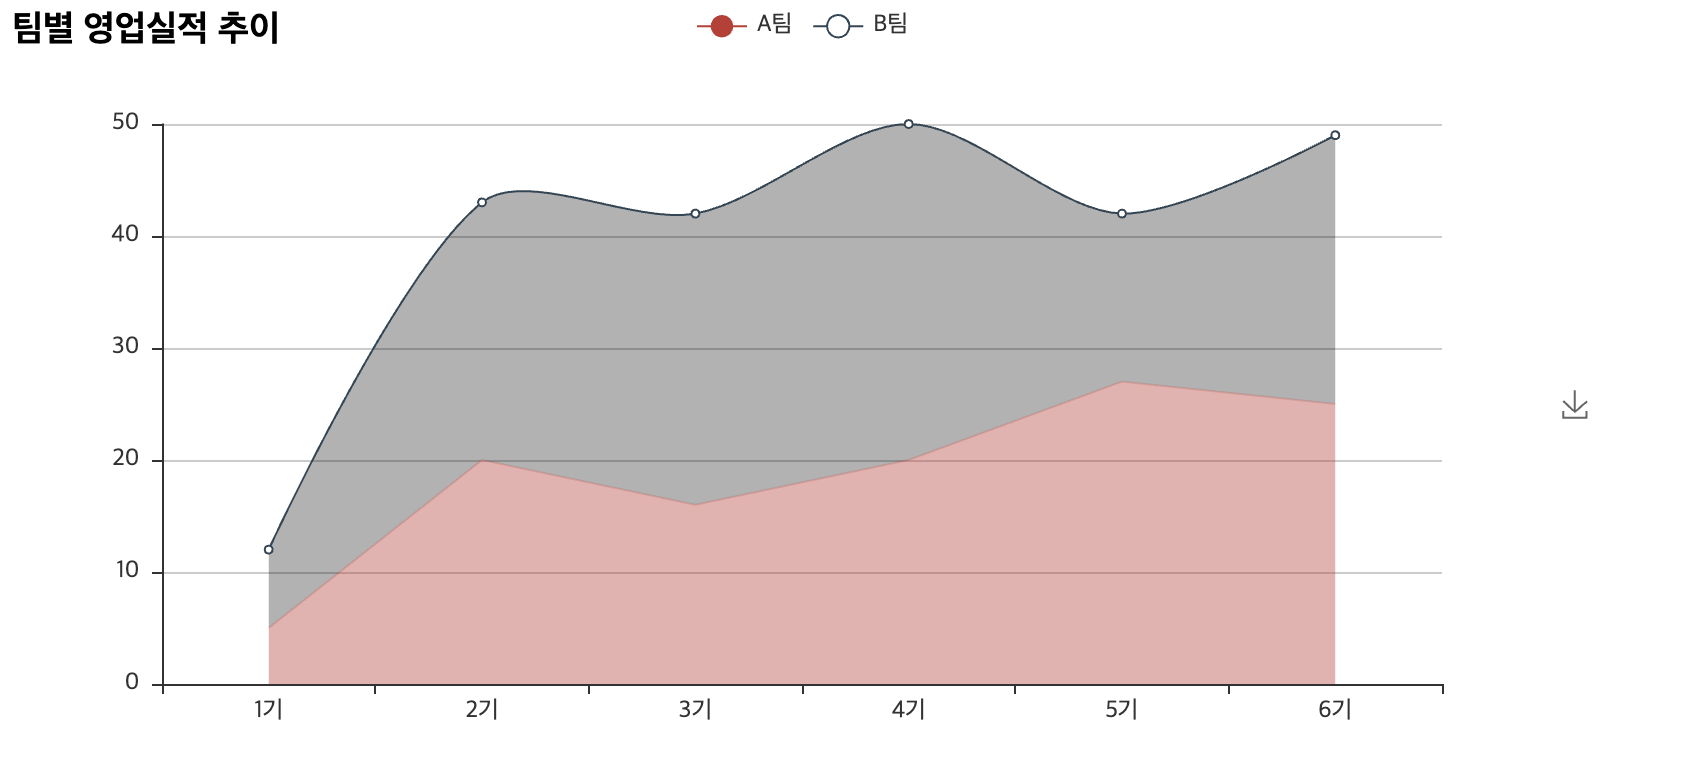

In [ ]:
line = Line("팀별 영업실적 추이")
line.add("A팀", attr, v1, is_fill=True, is_stack=True, line_opacity=0.2, area_opacity=0.4, symbol=None)
line.add("B팀", attr, v2, is_fill=True, is_stack=True, area_color='#000', area_opacity=0.3, is_smooth=True)
line.render('Chart 11.html')

**10번, 11번에서 사용된 파라미터 설명**

* `is_stack`: 라인 하나를 다른 라인 위에 올려서(stack) 표현할지 여부
* `is_label_show`: 라벨 표시 여부
* `is_fill`: 아래쪽 영역 채색 여부
* `symbol`: 마커 유형
* `is_smooth`: 점을 곡선으로 부드럽게 연결할지 여부

## Liquid Chart
특정 값을 강조하여 보여주는 시각 효과입니다. 리스트로 설정한 가장 큰 값을 강조하여 사용합니다.
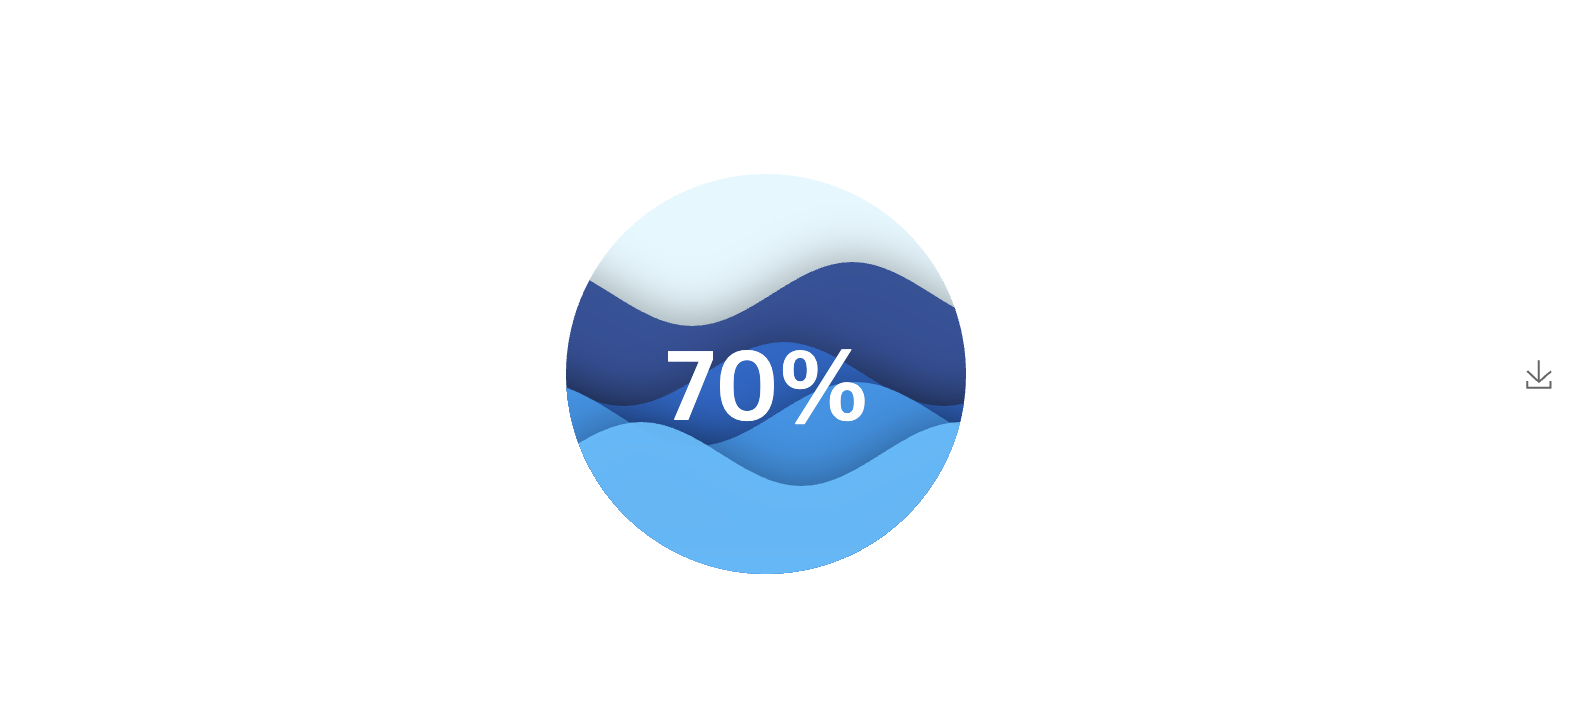

In [ ]:
from pyecharts import Liquid

liquid = Liquid()
liquid.add("Liquid", [0.7, 0.5, 0.4, 0.3], is_liquid_outline_show=False) #리스트는 각 물결의 높이를 의미하며, 가장 큰 값이 %로 표시됩니다.
liquid.render('Chart 12.html')

## 파이 차트 ★
여러 개의 값을 백분율로 환산하여 표시해 줍니다.

**Chart 13. 도넛형 파이 차트**
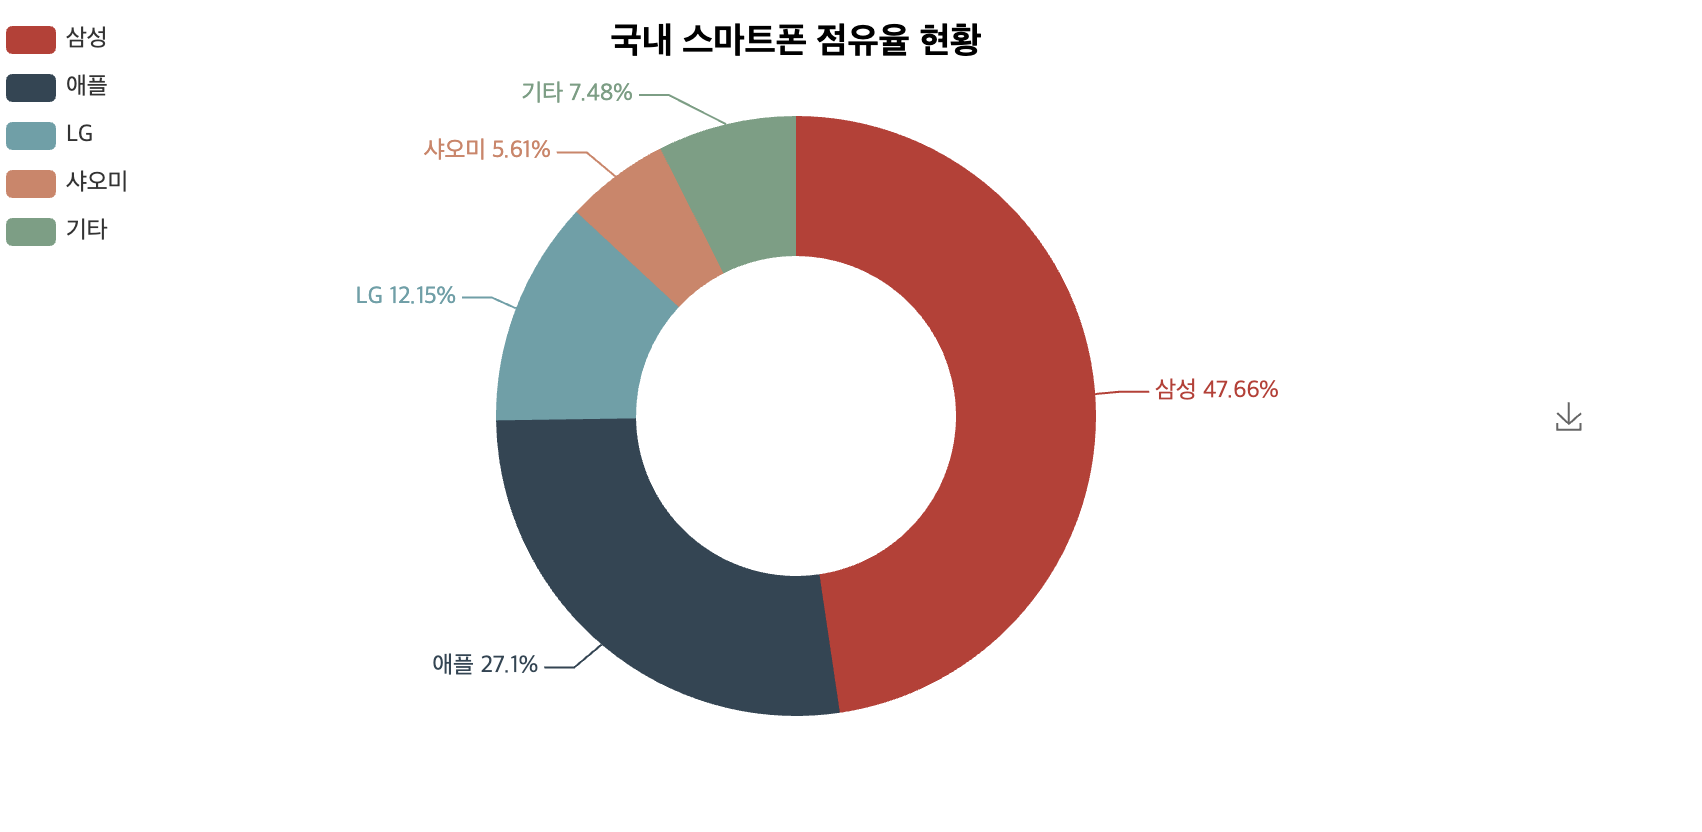
* `radius`를 통해 가운데 구멍의 크기를 조정합니다.
* 백분율로 값을 넣지 않아도 자동으로 환산되어 백분율로 계산됩니다.

In [ ]:
from pyecharts import Pie

attr = ["삼성", "애플", "LG", "샤오미", "기타"]
v1 = [51, 29, 13, 6, 8] #백분율이 아닌 값을 적을 경우 백분율로 환산됨
pie = Pie("국내 스마트폰 점유율 현황", title_pos='center')
pie.add("", attr, v1, radius=[40, 75], label_text_color=None, is_label_show=True,
        legend_orient='vertical', legend_pos='left')
pie.render('Chart 13.html')

## 극좌표 그래프 (Polar plot)
일반적으로 사용하는 **데카르트 좌표계** 대신 **극좌표계** 공간상에 표현하는 그래프입니다.

**Chart 14. 극좌표 그래프**
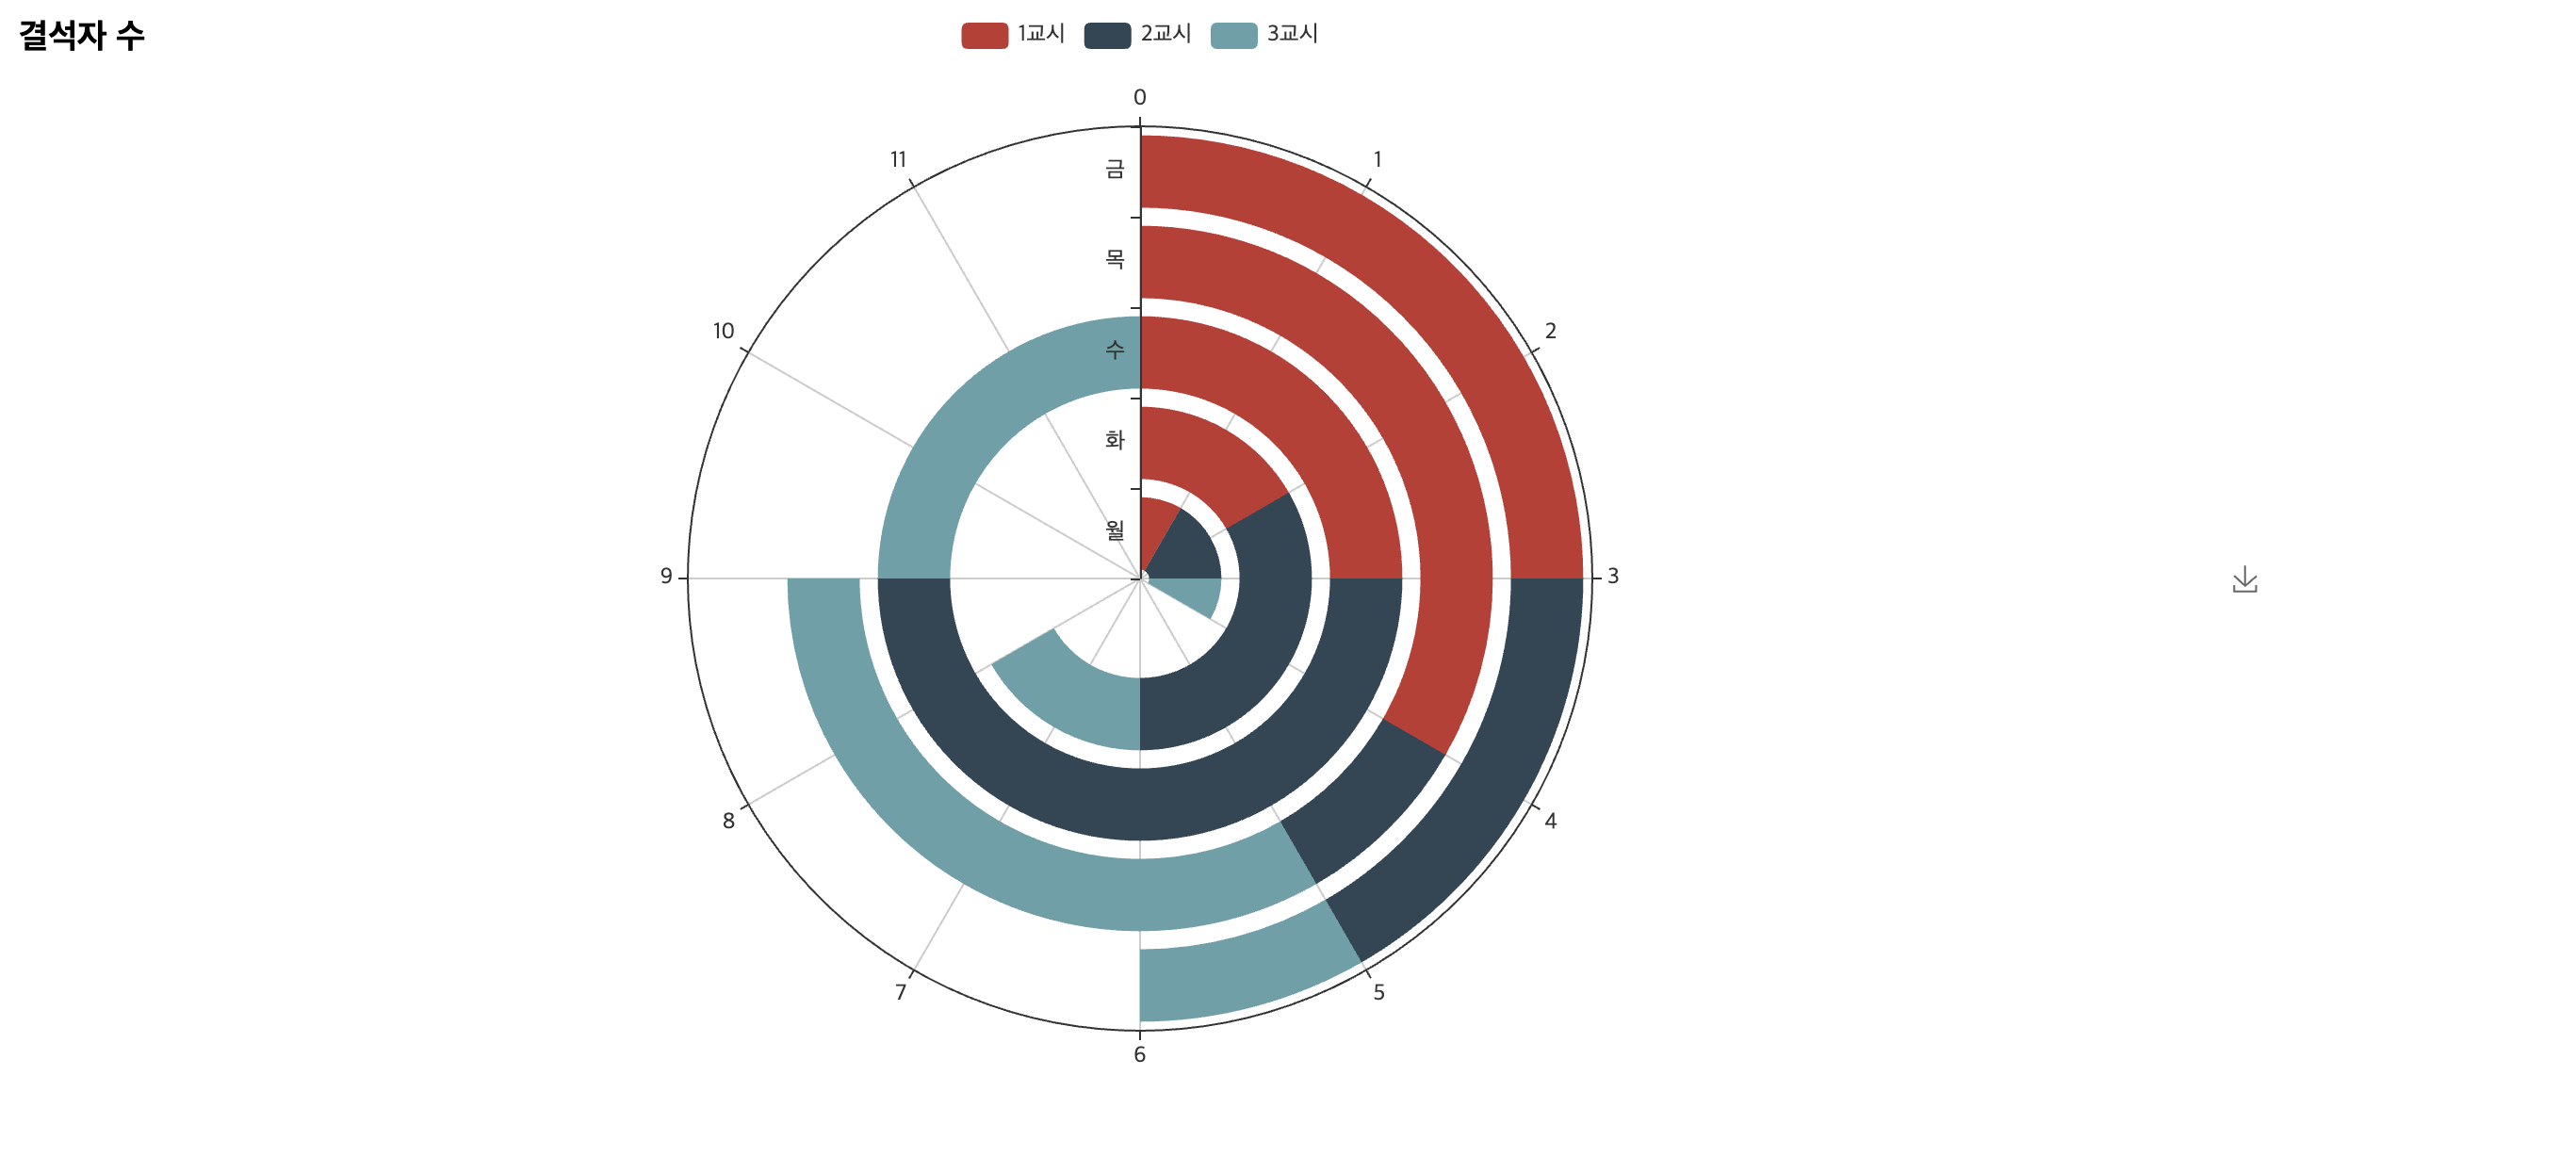

In [ ]:
from pyecharts import Polar

radius = ['월', '화', '수', '목', '금']
polar = Polar("결석자 수", width=1200, height=600)
polar.add("1교시", [1, 2, 3, 4, 3], radius_data=radius, type='barRadius', is_stack=True)
polar.add("2교시", [2, 4, 6, 1, 2], radius_data=radius, type='barRadius', is_stack=True)
polar.add("3교시", [1, 2, 3, 4, 1], radius_data=radius, type='barRadius', is_stack=True)
polar.render('Chart 14.html')

## 방사형 차트 (Radar chart) ★
특정 개체의 여러 속성을 도형 하나에 표현할 때 사용합니다.

**Chart 15. 두 개의 개체를 나타내는 방사형 차트**
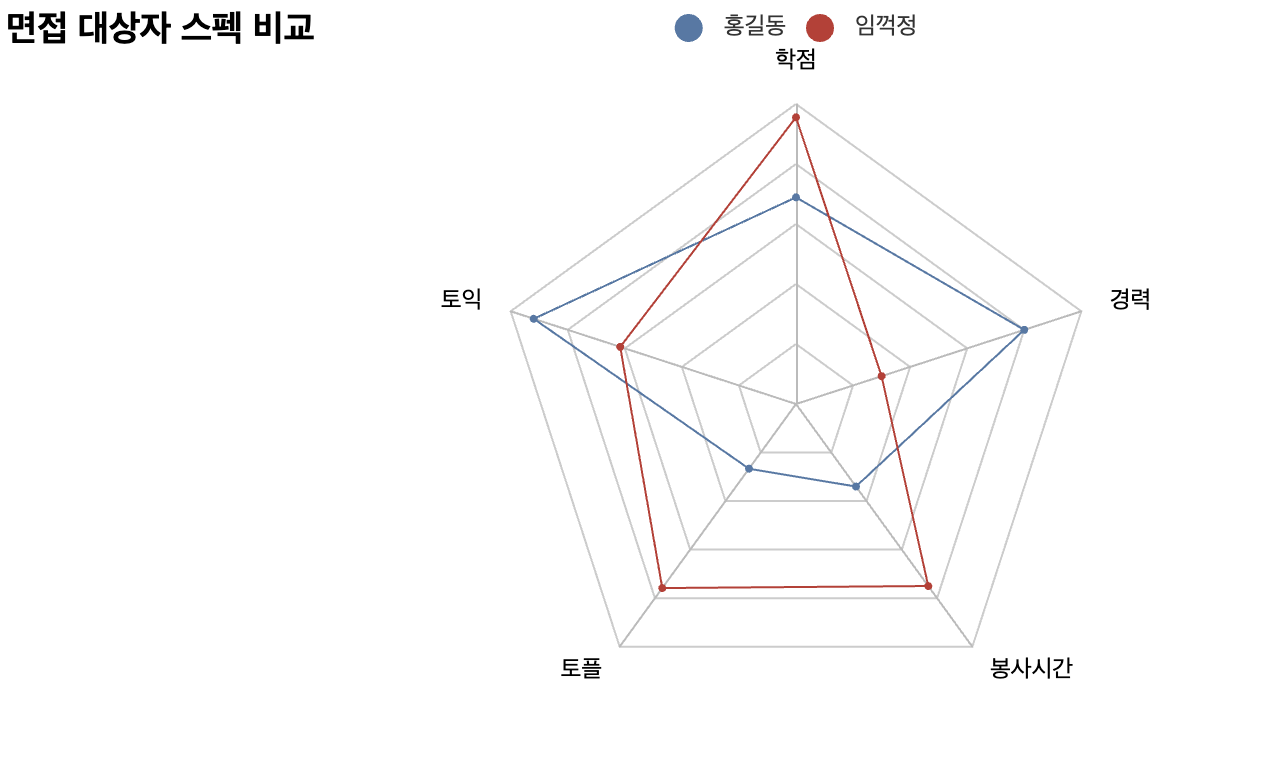

In [ ]:
from pyecharts import Radar

schema = [
    ("학점",4.5), ("토익", 990), ("토플", 120), ("봉사시간", 100), ("경력", 10)] #각 속성의 최대값 설정
v1 = [[3.1, 910, 32, 34, 8]]
v2 = [[4.3, 610, 91, 75, 3]]
radar = Radar("면접 대상자 스펙 비교")
radar.config(schema)
radar.add("홍길동", v1, is_splitline=True, is_axisline_show=True)
radar.add("임꺽정", v2, label_color=["#4e79a7"], is_area_show=False)
radar.render('Chart 15.html')

## 경로 시각화 (Sankey Chart)
특정 지점에서 다른 지점으로의 통행량을 시각화할 때 유용한 차트입니다.

**Chart 16.html**
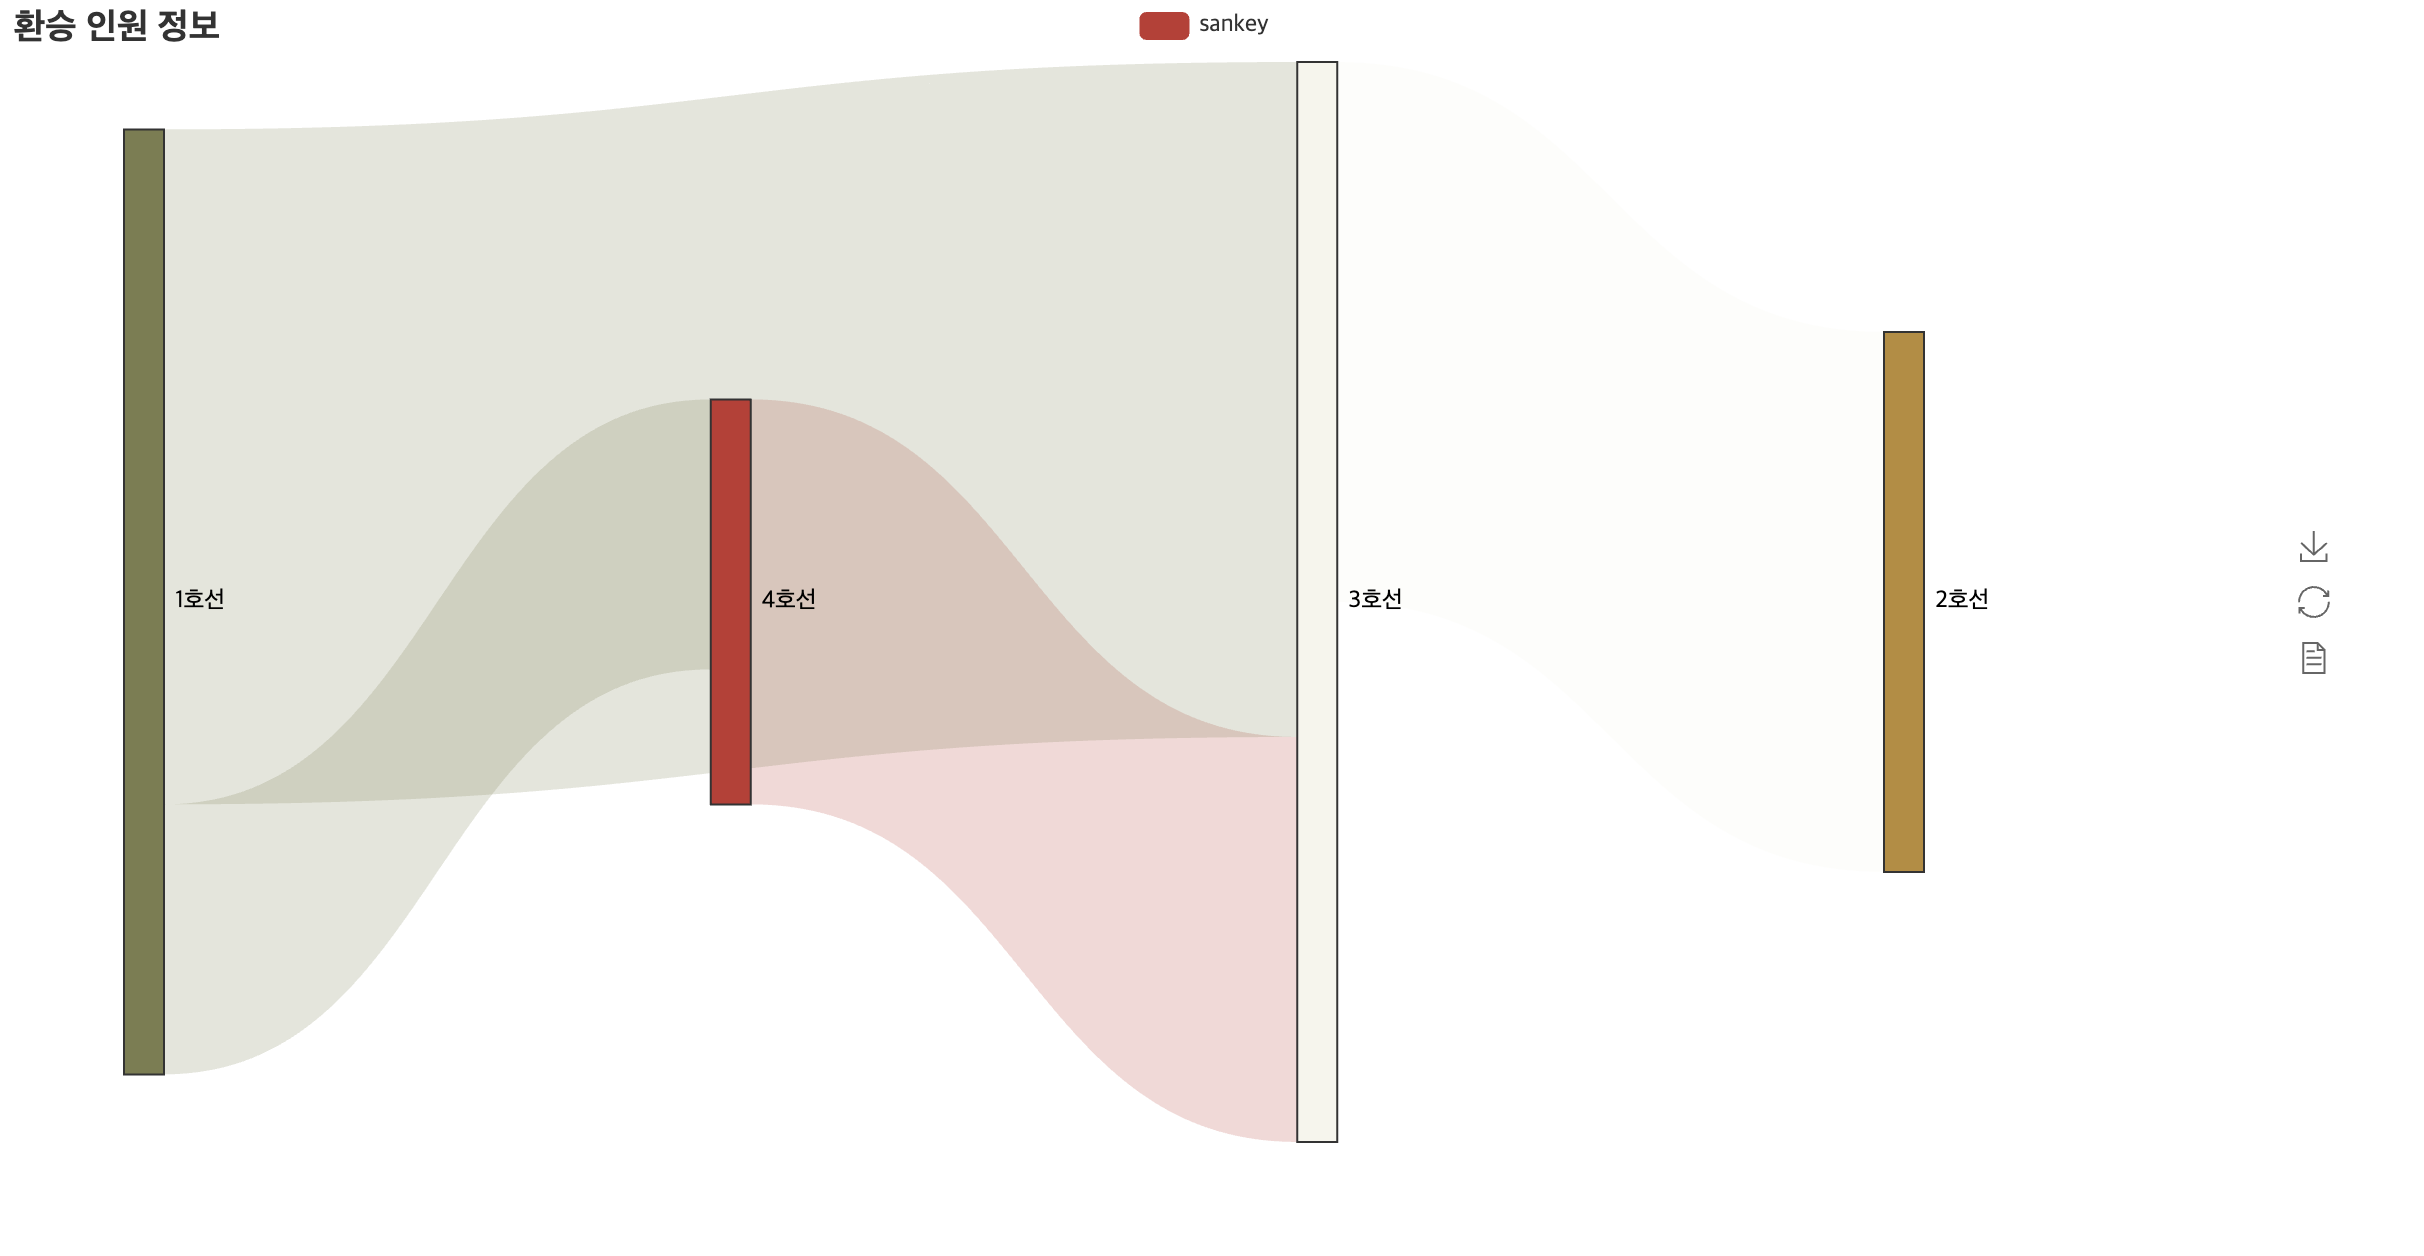

In [ ]:
from pyecharts import Sankey

#노드(지점) 설정
nodes = [
    {'name': '1호선'}, {'name': '2호선'}, {'name': '3호선'}, {'name': '4호선'}
]

#링크(노드 간 연결선) 설정
links = [
    {'source': '1호선', 'target': '4호선', 'value': 10},
    {'source': '4호선', 'target': '3호선', 'value': 15},
    {'source': '3호선', 'target': '2호선', 'value': 20},
    {'source': '1호선', 'target': '3호선', 'value': 25}
]

sankey = Sankey("환승 인원 정보", width=1200, height=600)
sankey.add(
    "sankey",
    nodes,
    links,
    line_opacity=0.2,
    line_curve=0.5,
    line_color="source",
    is_label_show=True,
    label_pos="right",
)
sankey.render('Chart 16.html')

## 3차원 산점도 


**Chart 17. 3차원 산점도**
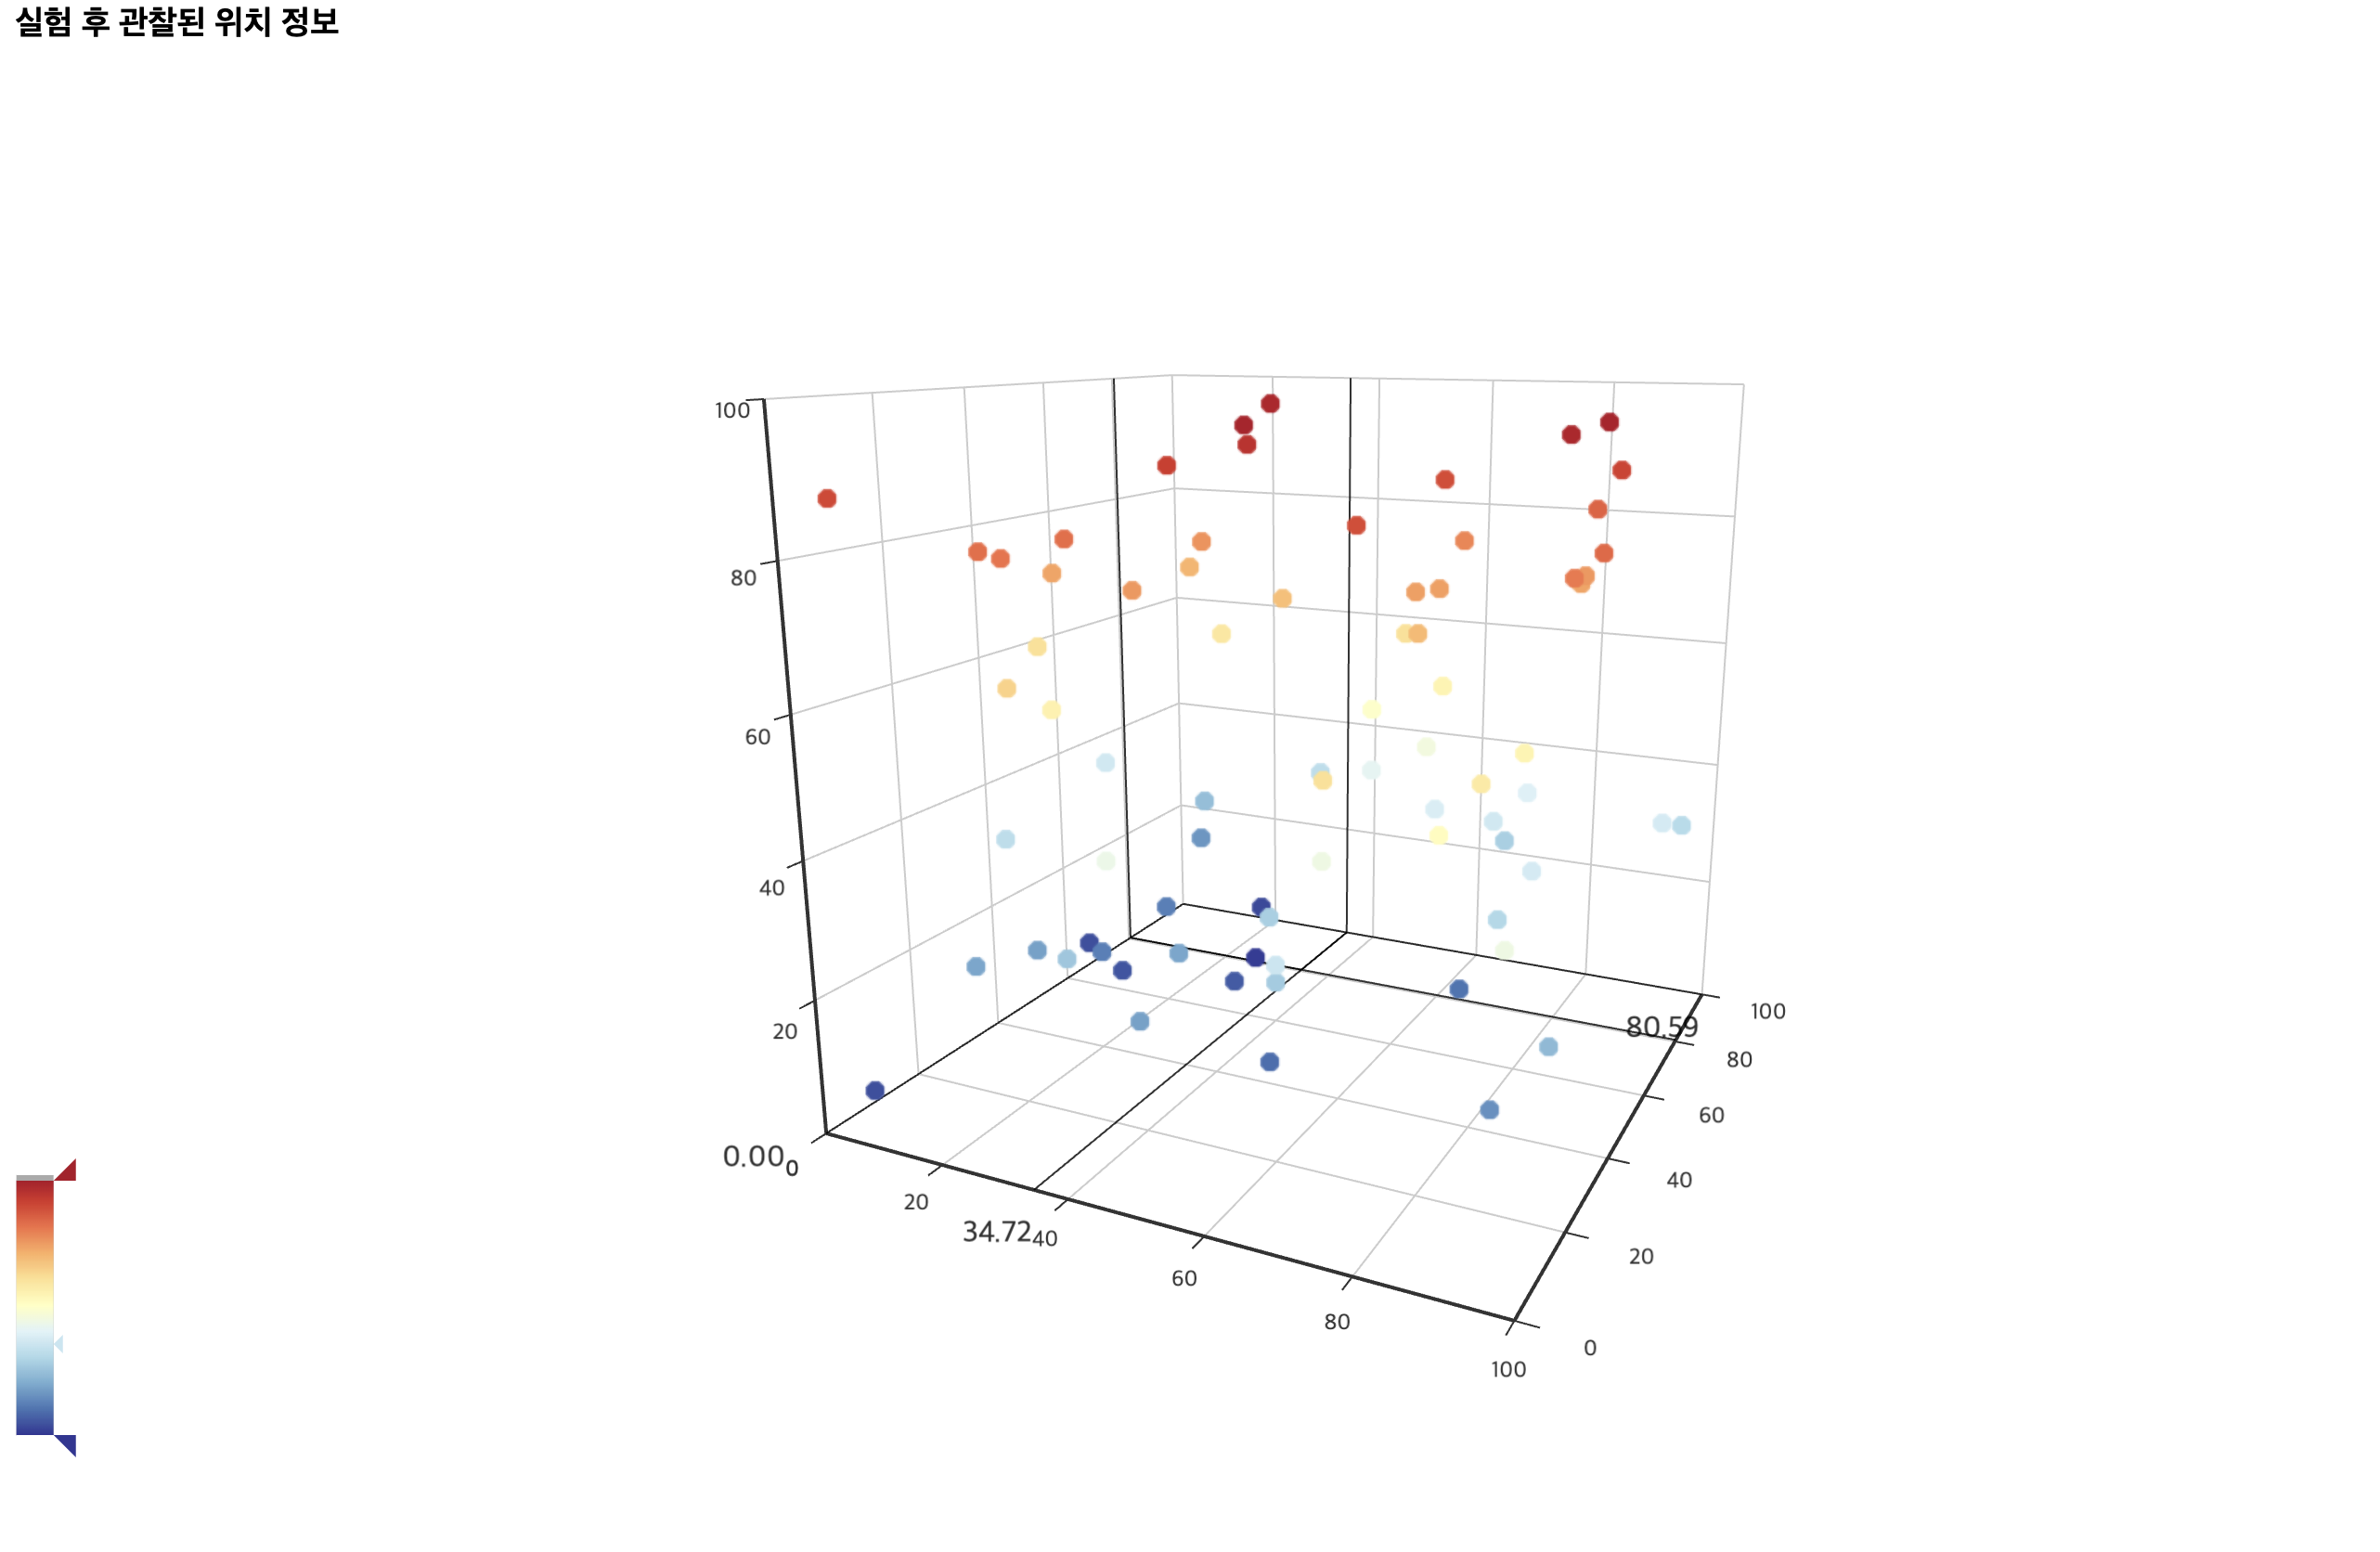

In [ ]:
from pyecharts import Scatter3D

import random
data = [[random.randint(0, 100), random.randint(0, 100), random.randint(0, 100)] for _ in range(80)] #랜덤값으로 데이터 생성
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026'] #값에 따라 표시할 색상의 범위
scatter3D = Scatter3D("실험 후 관찰된 위치 정보", width=1400, height=800)
scatter3D.add("", data, is_visualmap=True, visual_range_color=range_color)
scatter3D.render('Chart 17.html')

*(Chart 18 삭제)*

## 트리 맵 ★
트리 구조로 된 데이터를 사각형 그리드에 담아 표현합니다.
각 그리드를 클릭하여 하위 데이터의 크기를 직관적으로 확인할 수 있습니다.

**Chart 19. 트리 맵**
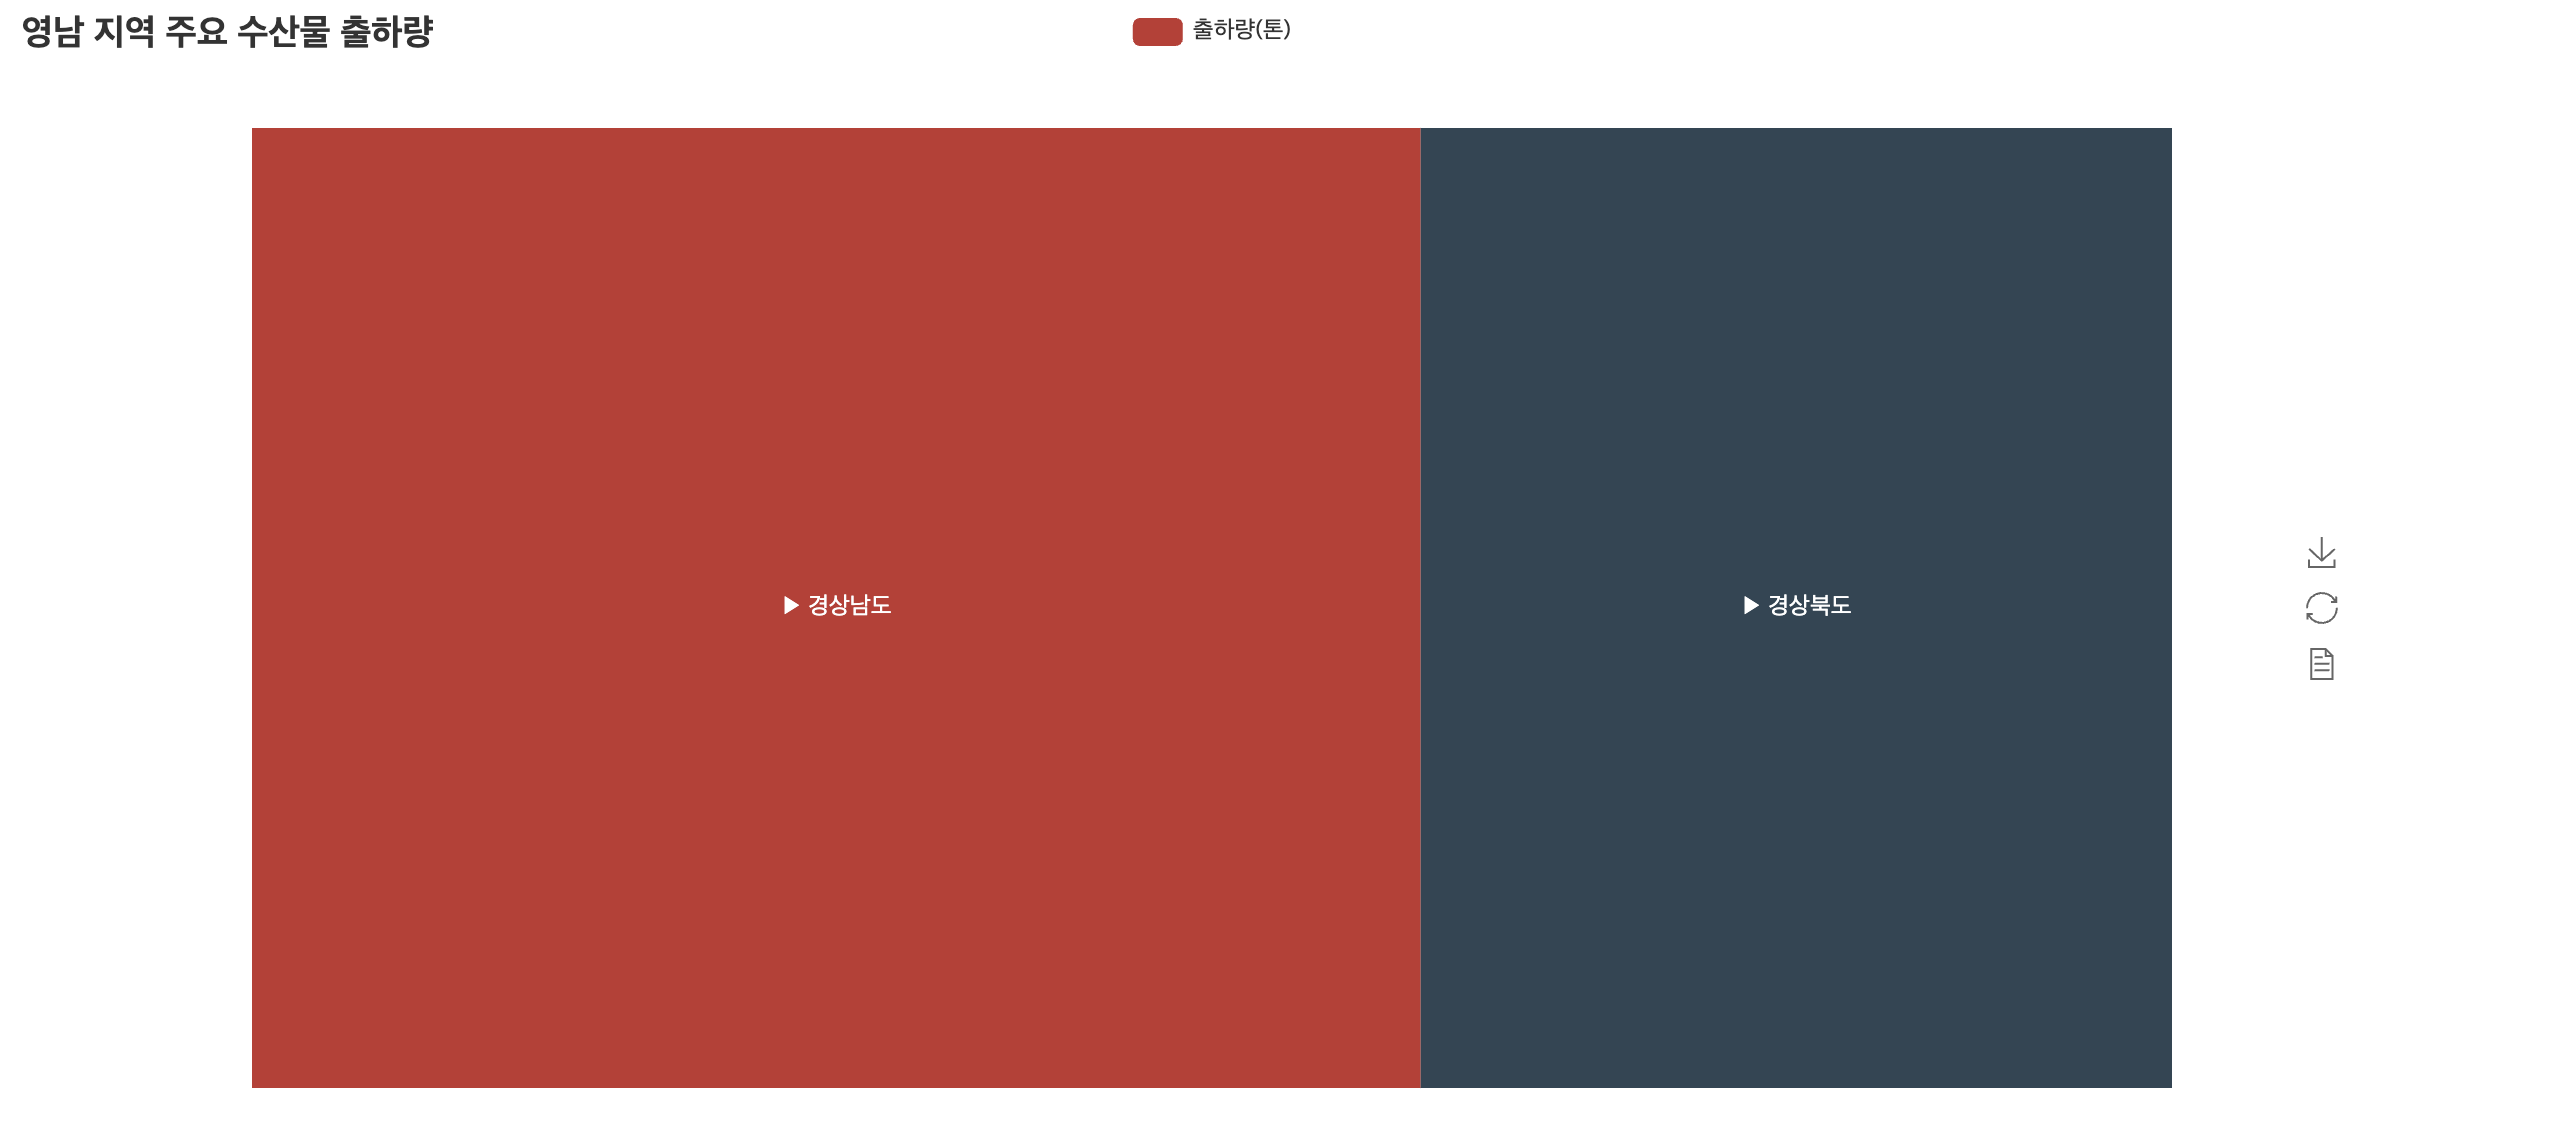

데이터는 `{"value":(값), "name":(이름)}`으로 생성합니다.

하위 데이터를 생성할 경우 딕셔너리에 "children"을 Dictionary Key로, {하위 데이터}를 Dictionary Value로 추가합니다.

In [ ]:
from pyecharts import TreeMap
data = [
    {"value": 90,"name": "경상북도", #1수준
      "children": [
          
            {"value": 34, "name": "울진군", #2수준
              "children": [
                      {"value": 12,"name": "도다리",}, #3수준
                      {"value": 28,"name": "가자미",},
                      {"value": 23, "name": "광어",}]},
                   
            {"value": 76,"name": "포항시",
              "children": [
                      {"value": 16,"name": "고등어",},
                      {"value": 18,"name": "대게",}]}]},
              
    {"value": 140,"name": "경상남도",
        "children": [
            
            {"value": 64, "name": "여수시",
              "children": [
                      {"value": 22,"name": "고등어",},
                      {"value": 8,"name": "다시마",},
                      {"value": 13, "name": "문어",}]},
                     
            {"value": 46,"name": "통영군",
              "children": [
                    {"value": 12,"name": "굴",},
                    {"value": 28,"name": "도다리",},
                    {"value": 20,"name": "갈치",}]}
                      ]}]

treemap = TreeMap("영남 지역 주요 수산물 출하량", width=1200, height=600)
treemap.add("출하량(톤)", data, is_label_show=True, label_pos='inside',
            treemap_left_depth=1)
treemap.render('Chart 19.html')

## Wordcloud
특정 문서를 구성하는 단어들을 그 빈도수에 따라 시각화한 그림을 의미합니다.

**Chart 20. 워드클라우드**
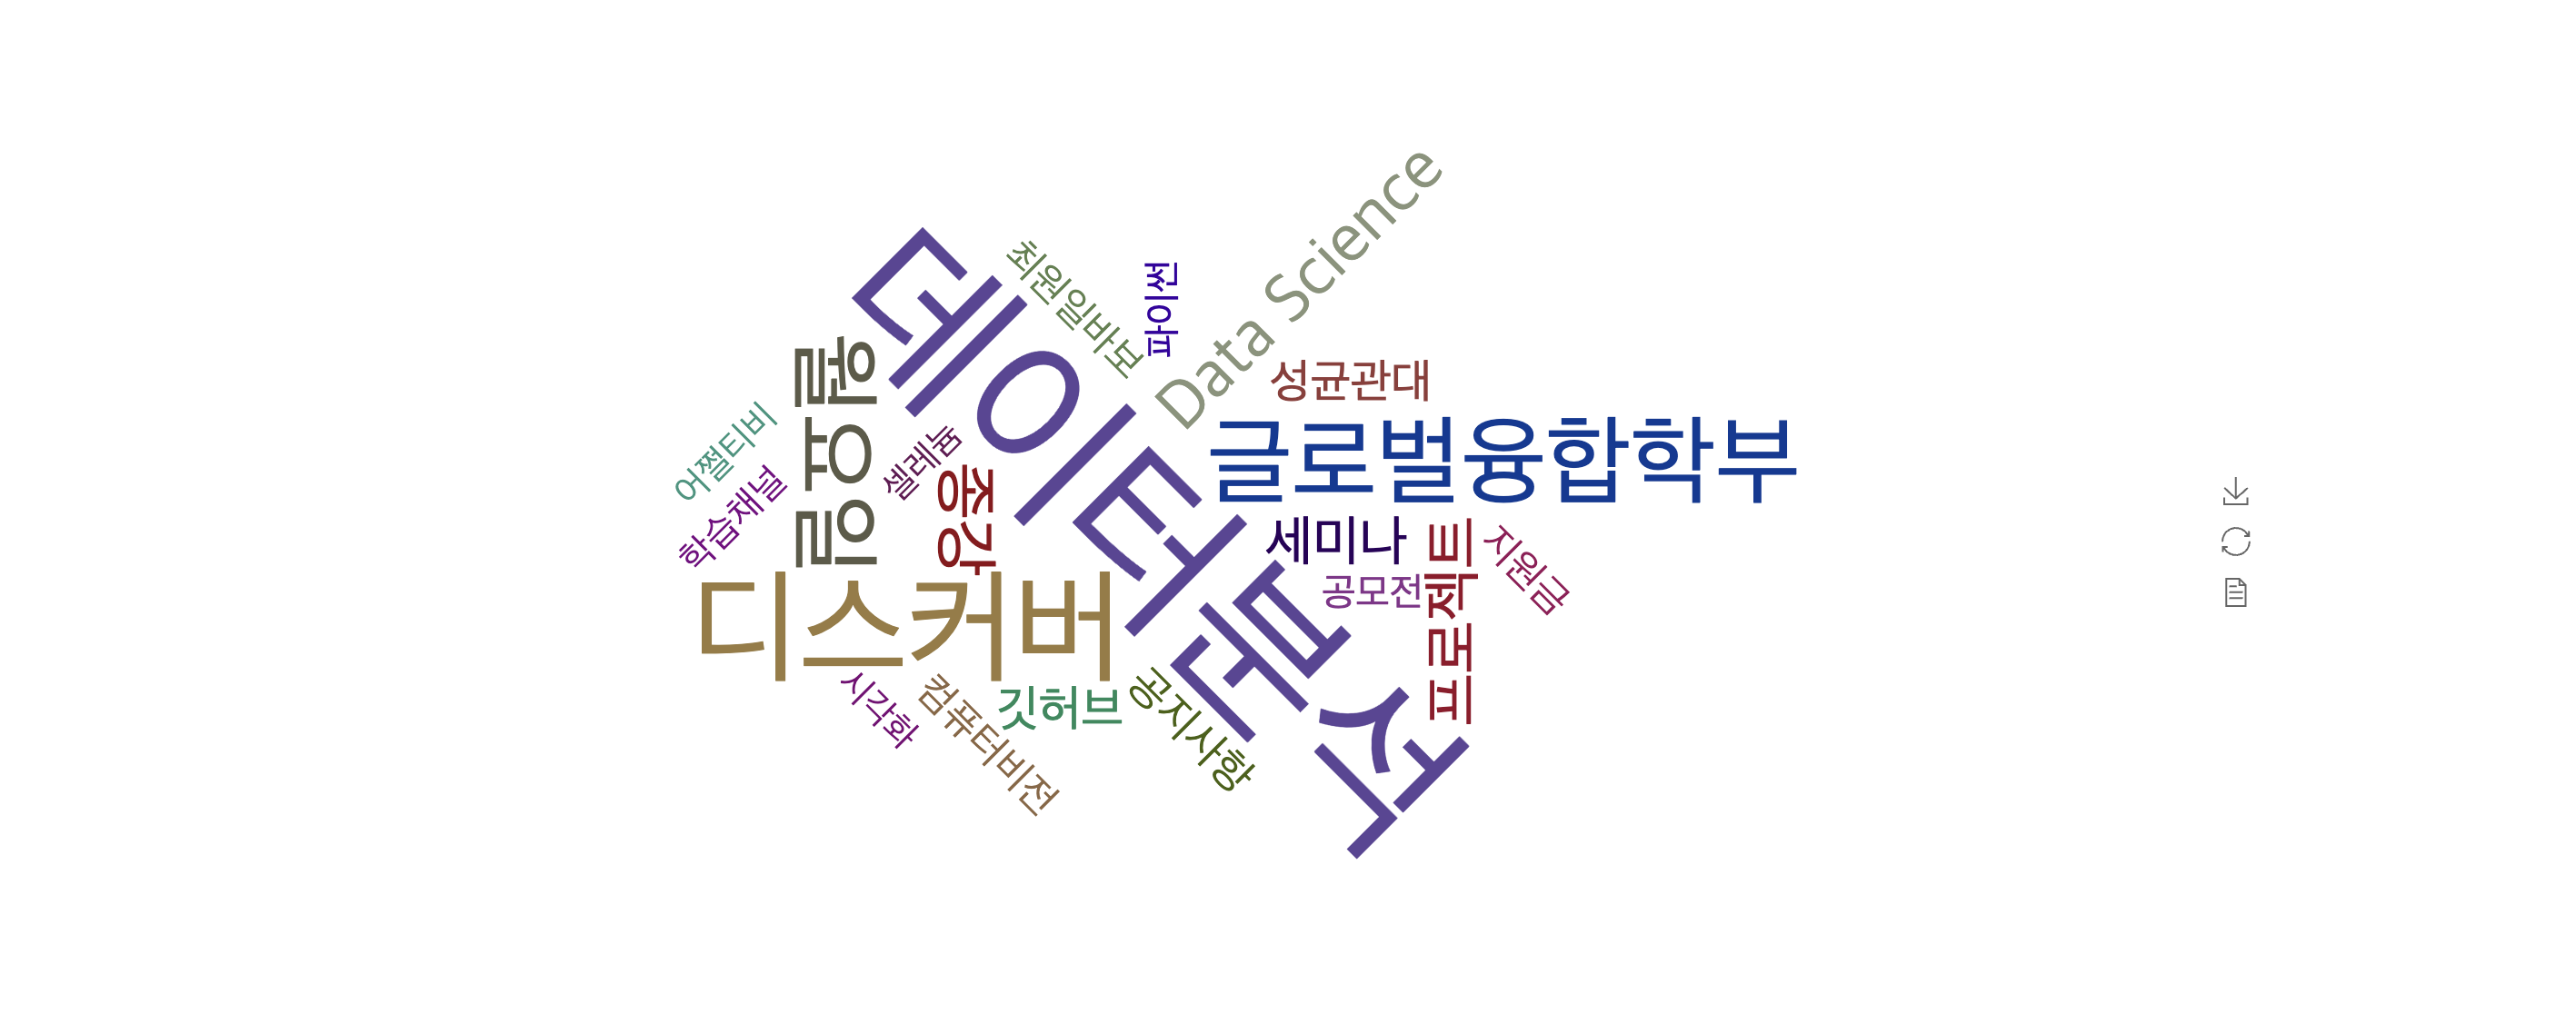

In [ ]:
from pyecharts import WordCloud

name = ['데이터분석', '디스커버', '글로벌융합학부', '월요일', 'Data Science',
        '종강', '프로젝트', '세미나', '깃허브', '성균관대', '공지사항',
        '컴퓨터비전', '최원일바보', '지원금', '공모전', '학습채널',
        '파이썬', '셀레늄', '시각화', '어쩔티비'] #단어 목록
value = [10000, 6181, 4386, 4055, 2467, 2244, 1898, 1484, 1112, 965, 847, 582, 555,
         550, 462, 366, 360, 282, 273, 265] #각 단어의 빈도수 (글자 크기로 사용됨)
wordcloud = WordCloud(width=1300, height=620)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud.render('Chart 20.html')